# Heart Health Insights🔍: Predicting Heart Disease with Machine Learning🤖
<div  align="center">
<img src="https://i.imghippo.com/files/klqAt1727000273.jpg">
</div>



`Author:` Isha Sarwar\
`Date:` 02-june-2024\
`Dataset:` [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download)

## 📋 Meta-Data (About Dataset)
### Context:
This is a multivariate dataset, meaning it involves a variety of separate mathematical or statistical variables for multivariate numerical data analysis. It is composed of 16 attributes: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), the slope of the peak exercise ST segment, the number of major vessels, and Thalassemia. This database includes 76 attributes, but researchers typically use these 16 to predict whether someone has heart disease. The Cleveland database is the only one used by machine learning (ML) researchers till date. One of the major tasks with this dataset is to predict, based on the given attributes of a patient, whether that particular person has heart disease. Another task is the experimental analysis to diagnose and uncover various insights from this dataset, which can help in understanding the problem more deeply.
### Content
#### Column Descriptions:
- `id `(Unique id for each patient)
- `age` (Age of the patient in years)
- `origin` (place of study)
- `sex` (Male/Female)
- ` cp` chest pain type 
    - typical angina
    - atypical angina
    -  non-anginal
    -  asymptomatic 
- `restbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- `chol` (serum cholesterol in mg/dl)
- `fbs` (if fasting blood sugar > 120 mg/dl)
- `restecg` (resting electrocardiographic results)
     - normal
     - stt abnormality
     - lv hypertrophy
- `thalach:` maximum heart rate achieved
- `exang:` exercise-induced angina (True/ False)
- `oldpeak:` ST depression induced by exercise relative to rest
- `slope:` the slope of the peak exercise ST segment
- `ca:` number of major vessels (0-3) colored by fluoroscopy
- `thal:`Thallium Stress Test
     - normal
     - fixed defect
     -  reversible defect
- `num:` the predicted attribute 
  
###  Acknowledgements
#### Creators:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
- Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

**`They would be:`**

 - Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
 - University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
 - University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
 - V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## **Abstract**
In this project, I will start by exploring the dataset through `EDA` (Exploratory Data Analysis) to find useful patterns and insights. I  will then analyze the relationships between different features to identify which ones are most important for predicting the target variable. Finally, I will build and carefully evaluate a machine learning model to ensure it makes accurate predictions.

<div style='color:#85B19D; font-size:190%; font-weight:bold> Abstract</div>
In this project, I will start by exploring the dataset through EDA (Exploratory Data Analysis) to find useful patterns and insights. I will then analyze the relationships between different features to identify which ones are most important for predicting the target variable. Finally, I will build and carefully evaluate a machine learning model to ensure it makes accurate predictions.

### 📚 1. Import Libraries
Let's start the project by importing all the libraries that we will need in this project.

In [1]:
#Import Libraries

# For Data handling
import pandas as pd
import numpy as np

# To Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# To Preprocess the data
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# For Machine Learnning
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For Classification Tasks
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier



# Evaluation Metrics for Classification Models
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,classification_report,confusion_matrix

# To print the table
from tabulate import tabulate


#ignore Warnings
import warnings
warnings.filterwarnings('ignore')


### 📂 2. Load The Dataset




In [2]:
# Load the Data from CSV file
df=pd.read_csv('heart_disease_uci.csv')

# Print the first few rows  of the Dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### 📊 3. Exploratery Data Analysis (EDA)

> 🔍 Let's Explore Each Column

In [3]:
#Exploring the Datatype of each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB



#### 🧐`Observations:`

Here are  some observations about the dataset.
  - The dataset includes information about 920 entries, which likely represent individuals.
  - Each entry has 16 columns, consisting of various features such as age, sex, cholesterol levels (chol), resting blood pressure (trestbps), etc.
  - Some Columns have missing values, such as resting electrocardiographic (trestecg),cholesterol levels(chol), fasting blood sugar(fbs), resting blood pressure( restbps) etc,indicationg that not all the data points are complete.
  - Features like sex, dataset, cp, fbs, restecg, exang, slope, ca, and thal are categorical.
  

>

>👀 Exploring the `id` Column

In [4]:
#Finding maximum and minimum values of the 'id' column in a DataFrame
print('==========================================')
print(f"❉ The minimum value of id is: {df['id'].min()}\n❉ The maxmimum value of id column is: {df['id'].max()}")
print('==========================================')

❉ The minimum value of id is: 1
❉ The maxmimum value of id column is: 920


In [5]:
#Descriptive Statistics
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


>👀 Let's take a look at the `Age` Column

The age column is an important feature for predicting heart disease. Let's dive in and see what insights we can uncover.

In [6]:
# let's find out the minimum and maximum age 
print('==========================')
print(f"❉ The minimum age is: {df['age'].min()}\n❉ The maxmimum age is: {df['age'].max()}")
print('==========================')


❉ The minimum age is: 28
❉ The maxmimum age is: 77


In [7]:
#check the missing values in the age column
print('*********************************************')
print(f"❉ The missing values in the age column is: {df['age'].isnull().sum()}")
print('*********************************************')

*********************************************
❉ The missing values in the age column is: 0
*********************************************


- Since there are no missing values in the age column, let's explore the distribution of the age column.

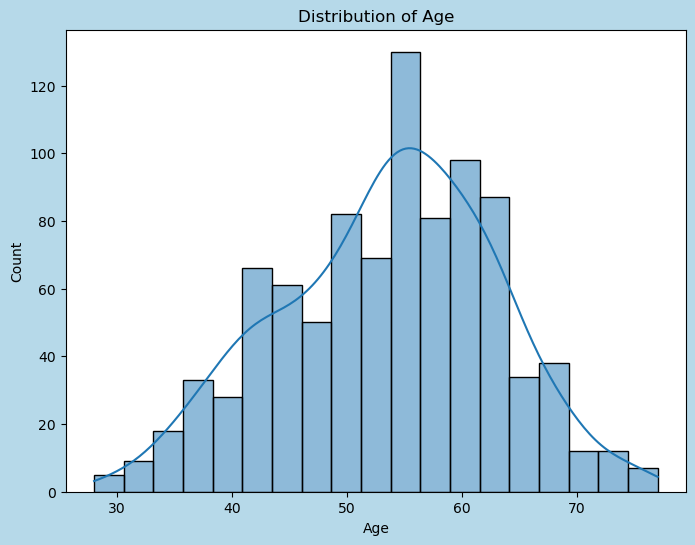

In [8]:
#Draw a histogram to see the distribution of age column
plt.figure(figsize=(8,6),facecolor='#B6D9E9')
sns.histplot(x=df['age'],data=df,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

 📊 **Insight:** <span style="color:skyblue;">When we look at the histogram, we observe that the age distribution is normal.Most of the People in the dataset are around 54 years old, and fewer people are either young or older. </span>

✯ Mean: 53.51086956521739
✯ Median: 54.0
✯ Mode: 54
***********************************


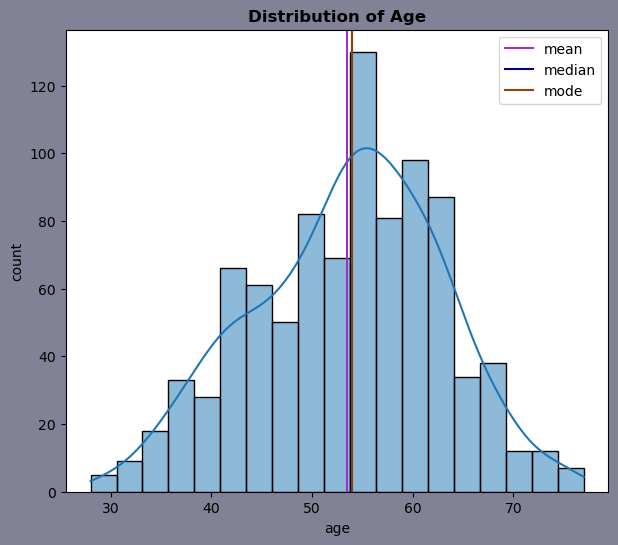

In [9]:
#Print the value of mean,median,mode of the age colmn
print('✯ Mean:',df['age'].mean())
print('✯ Median:', df['age'].median())
print('✯ Mode:', df['age'].mode()[0])

print('***********************************')

#Plot the mean,median,mode of the age column
plt.figure(figsize=(7,6),facecolor='#818296')
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='darkorchid',label='mean')
plt.axvline(df['age'].median(), color='darkblue', label='median')
plt.axvline(df['age'].mode()[0], color='saddlebrown', label='mode')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Distribution of Age', fontweight='bold')
plt.legend()
plt.show()

📊**Insight:**
<font color='skyblue'>
- The minimum age to have a heart disease is 28 years old.
- Many people are diagnosed with heart disease around the age of 53-54 years.
</font>

- 👥 Let's look at the age distribution based on gender in the dataset.

In [10]:
#Draw a histogram to see the distribution
fig=px.histogram(df, x='age', color='sex', color_discrete_map={'Male':'#0077B6' , 'Female':'#00b4d8'}, title='Age Distribution By Gender',
                 width=900, height=500 )
fig.show()

📊**Insight**
<font color='skyblue'>
- The age distribution shows that both males and females have similar spread of ages.
- Males have slightly higher frequency in younger age groups as compared to females.
- Most of the males and females with heart disease are around 54-55 years old.</font>



>👀 Let's take a look at the `Sex` Column


In [11]:
#find the value count  of sex column
pd.DataFrame(df['sex'].value_counts())


,count
sex,
Male,726
Female,194


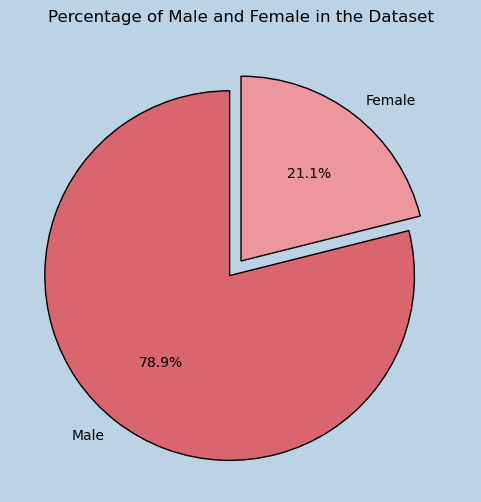

In [12]:
#calculate the percentage of female and male in the dataset
male_count=726
female_count=194

male_percentage=male_count/len(df)*100
female_percentage=female_count/len(df)*100


# Define the labels and sizes for the pie chart
labels = ['Male', 'Female']
percentages = [male_percentage, female_percentage]
colors = [ '#D9656F' ,'#ED969E']


#create a pie chart to represent the percentage of male and female in the dataset
plt.figure(figsize=(15,6), facecolor='#BCD3E6')
plt.pie( percentages, labels=labels, autopct='%.1f%%', colors=colors, explode=[0.1,0], wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, startangle=90)
plt.title('Percentage of Male and Female in the Dataset')
plt.show()





#### 🧐`Observations:`
There is a significant imbalance in the number of male patients `726` compared to female patients `194`. This might lead to models that are more accurate for males but less so for females due to the higher representation of male data points, which could lead to gender bias in any analysis or predictive modeling.


In [13]:
pd.DataFrame(df.groupby('sex')['age'].value_counts())

count
sex    age       
Female 54      15
       51      11
       62      10
       43       9
       48       9
...           ...
Male   77       2
       28       1
       31       1
       33       1
       76       1

[91 rows x 1 columns]

>👀Dealing with `Dataset` Column

In [14]:
pd.DataFrame(df['dataset'].unique())

,0
0,Cleveland
1,Hungary
2,Switzerland
3,VA Long Beach


In [15]:

fig=px.pie(df,names='dataset' , hole=0.7, title='Data Collection States🌍',color_discrete_sequence=['#4B1026', '#CC3861', '#D9718A', '#E4A6B5'],
           width=1000, height=500)
fig.update_layout(paper_bgcolor='#EED3CD', title_font_size=20, legend_title='Collection states')
fig.show()

In [16]:
#find the value count of the dataset column
pd.DataFrame(df['dataset'].value_counts() )

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


💡**Insight**
- The largest number of people in our dataset are from Cleveland `(304)` ,While smallest number of people are from Switzerland `(123)`.

In [17]:
#plot the countplot of the dataset column
fig=px.histogram(df, x='dataset', histfunc='count', color='sex', title='Distribution of Dataset Sources', 
                 color_discrete_map={'Male':'#741B47', 'Female':'#C37BA0'}, width=1000, height=500)
fig.update_layout(title_font_size=20)
fig.show()


📊**Insight**
<font color='skyblue'>
-  The highest number of females in this dataset are from Cleveland (97), While the lowest number are from VA Long Beach (6).
- The highest number of males in this dataset are from Hungary (212), While the lowest number are from Switzerland (113).
</font>

In [18]:
#create a plot of the age column,with colors representing the dataset column
fig=px.histogram(df, x='age', color='dataset', title='Age Distribution by Dataset Source',
                color_discrete_sequence=['#7C0F24','#C44041', '#F09D7D','#E3846C'],
                 width=1000, height=500)
fig.update_layout(title_font_size=20, legend_title='Dataset Source')
fig.show()

>👀Let's Explore the `CP` Column.

In [19]:
#find out the unique values in the cp column
pd.DataFrame(df['cp'].unique())

,0
0,typical angina
1,asymptomatic
2,non-anginal
3,atypical angina


In [20]:

count=df['cp'].value_counts()
fig=px.pie(values=count.values, names=count.index,hole=0.6, color_discrete_sequence=['#845F65','#976F72' ,'#C1898F','#CC9A9F'],
           title='Distribution of Chest Pain Types', width=1000, height=500)
fig.update_layout(title_font_size=20, legend_title='Chest Pain Types', paper_bgcolor='#A3CDD0')
fig.show()


In [21]:
pd.DataFrame(df.groupby('cp')['sex'].value_counts())


count
cp              sex          
asymptomatic    Male      426
                Female     70
atypical angina Male      113
                Female     61
non-anginal     Male      151
                Female     53
typical angina  Male       36
                Female     10

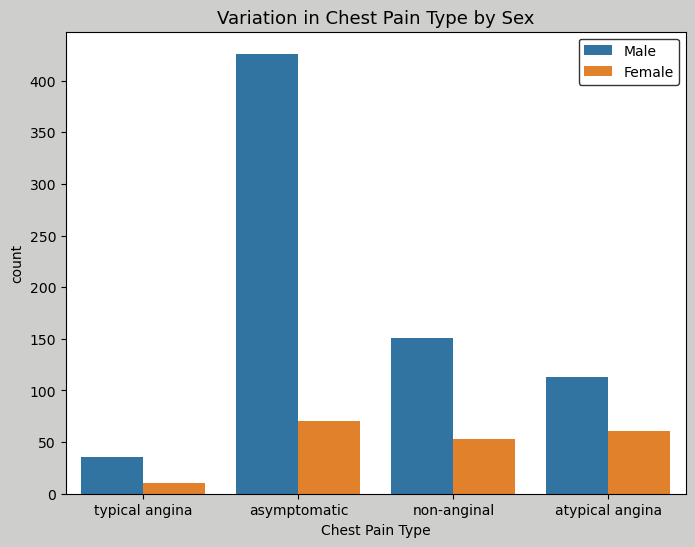

In [22]:
#count plot of cp column by sex
plt.figure(figsize=(8,6), facecolor='#CECECC')
sns.countplot(df, x='cp',hue='sex')
plt.xlabel('Chest Pain Type')
plt.title('Variation in Chest Pain Type by Sex', fontsize=13)
plt.legend(edgecolor='black')
plt.show()

📊**Insights:**
<font color='skyblue'>
- For each chest pain type males have higher counts compared to females.
- The most common chest pain type is asymptomatic,particulary among the males.
- Many more males experiencing asymptomatic chest pain compared to females.
- Typical angina is the least common chest pain type for both males and females.
- Non-anginal and atypical angina show a similar pattern with more males affected, but the gender  difference is smaller compared to asymptomatic chest pain.
</font>
  

In [23]:
pd.DataFrame(df.groupby('cp')['dataset'].value_counts())

count
cp              dataset             
asymptomatic    Cleveland        144
                VA Long Beach    131
                Hungary          123
                Switzerland       98
atypical angina Hungary          105
                Cleveland         51
                VA Long Beach     14
                Switzerland        4
non-anginal     Cleveland         86
                Hungary           54
                VA Long Beach     47
                Switzerland       17
typical angina  Cleveland         23
                Hungary           11
                VA Long Beach      8
                Switzerland        4

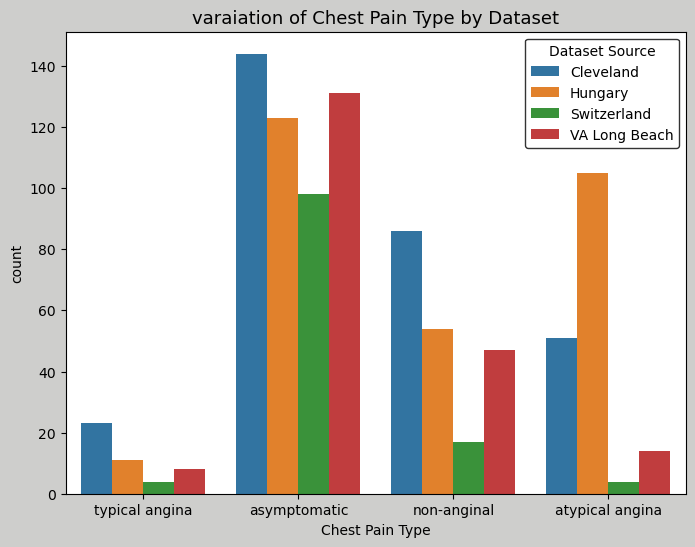

In [24]:
#count plot of cp column by dataset column
plt.figure(figsize=(8,6), facecolor='#CECECC')
sns.countplot(df,x='cp', hue='dataset' )
plt.xlabel('Chest Pain Type')
plt.title('varaiation of Chest Pain Type by Dataset', fontsize=13)
plt.legend(edgecolor='black', title='Dataset Source')


📊**Insights:**
 | <font color='#38ADAA'>Chest Pain Type</font>|<font color=#38ADAA>Dataset</font> |<font color='#38ADAA'>Count</font> |<font color='#38ADAA'>Description </font>|
|--------------------|----------------|-------|--------------------------------------------------|
| Asymptomatic       | Cleveland      | 144   | No noticeable symptoms                           |
|                    | VA Long Beach  | 131   | No noticeable symptoms                           |
|                    | Hungary        | 123   | No noticeable symptoms                           |
|                    | Switzerland    | 98    | No noticeable symptoms                           |
| Atypical Angina    | Hungary        | 105   | Unusual chest pain                               |
|                    | Cleveland      | 51    | Unusual chest pain                               |
|                    | VA Long Beach  | 14    | Unusual chest pain                               |
|                    | Switzerland    | 4     | Unusual chest pain                               |
| Non-anginal        | Cleveland      | 86    | Chest pain not related to heart problem          |
|                    | Hungary        | 54    | Chest pain not related to heart problem          |
|                    | VA Long Beach  | 47    | Chest pain not related to heart problem          |
|                    | Switzerland    | 17    | Chest pain not related to heart problem          |
| Typical Angina     | Cleveland      | 23    | Common chest pain usually caused by exertion     |
|                    | Hungary        | 11    | Common chest pain usually caused by exertion     |
|                    | VA Long Beach  | 8     | Common chest pain usually caused by exertion     |
|                    | Switzerland    | 4     | Common chest pain usually caused by exertion     |



In [25]:

fig=px.histogram(df, x='age', color='cp', title='Age-Related Variation in Chest Pain Type',
                 color_discrete_map={'typical angina':'#4B1026','asymptomatic':'#CC3861','non-anginal':'#D9718A','atypical angina':'#E4A6B5'},
                 width=1000, height=500,)
fig.update_layout(title_font_size=20, legend_title='Chest Pain Type',paper_bgcolor='#B4E1E3')
fig.show()

>👀let's explore the  `trestbps` column.

The normal resting blood pressure is 120/80 mm mg.

####  ` What will Happen if the Blood Pressure is too High or Low?`

- 🌡️**High blood pressure** (Hypertension) can narrow and damage the arteries that supply blood to the heart. This condition is known as coronary artery disease.Increased pressure can lead to Heart Attack,Heart failure.
- 🤕**Low Blood Pressure** (Hypotension) to the heart can lead to chest pain, called angina,often signaling the heart is under stress. It can lead to irregular heart rhythms, called arrhythmias. Sudden drops in blood pressure can cause dizziness and fainting😵, increasing the risk of falls and injury.

In [26]:
#Statistical Summary of Resting Blood Pressure(trestbps)
pd.DataFrame(df['trestbps'].describe()).T

,count,mean,std,min,25%,50%,75%,max
trestbps,861.0,132.132404,19.06607,0.0,120.0,130.0,140.0,200.0


Text(0.5, 0, 'Resting Blood Pressure')

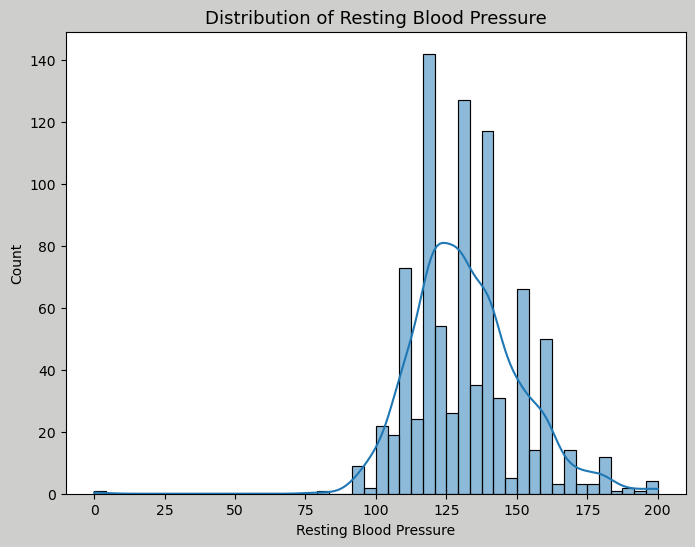

In [27]:
#Draw a histogram  to see the distribution of trestbps column
plt.figure(figsize=(8,6), facecolor='#CECECC')
sns.histplot(x=df['trestbps'],data=df,kde=True)
plt.title('Distribution of Resting Blood Pressure', fontsize=13)
plt.xlabel('Resting Blood Pressure')

📊**Insights:** <font color='skyblue'>
-  Most of the people in the dataset having a resting blood pressure around 120-130 mm Hg.
-  Resting blood pressure values generally range from about 75 to 200 mm Hg, with most values clustering between 100 and 150 mm Hg.
-  There are outliers in the dataset where Some people have blood pressure values that are much higher or much lower than the average value in the dataset.
</font>

#### `🧐Observation:`
>A resting blood pressure close to `0` mm Hg is not physiologically possible for a living person. Normal resting blood pressure ranges from about `90 to 140 mm Hg` systolic. Values close to 0 could be due to errors in data entry or measurement.

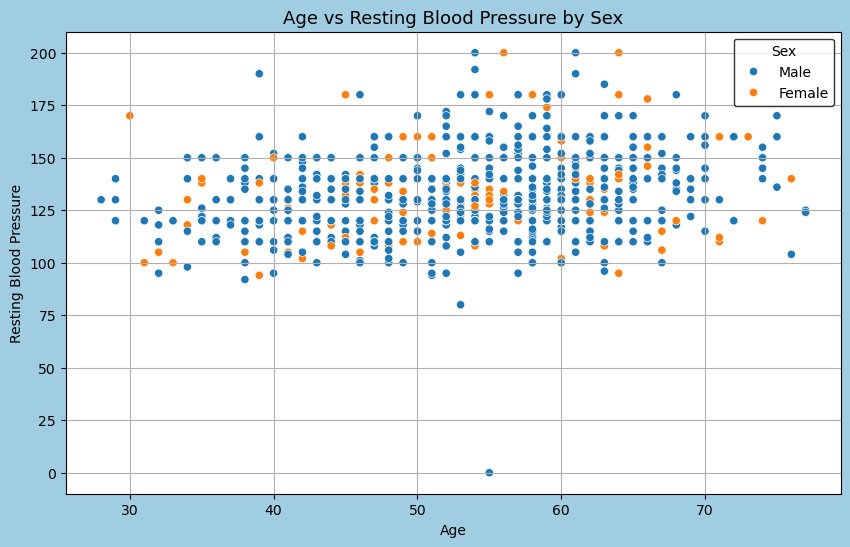

In [28]:
#Draw a scatter plot of age vs trestbps by sex
plt.figure(figsize=(10,6), facecolor='#A1CDE2')
sns.scatterplot(df, x='age', y='trestbps', hue='sex')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs Resting Blood Pressure by Sex', fontsize=13)
plt.legend(edgecolor='black', title='Sex')
plt.grid(True)
plt.show()

📊**Insights:**<font color='skyblue'>
- There is a slight upward trend indicating that resting blood pressure tends to increase with age.However, this increse is not very strong.
- Both males and females have very similr average resting blood pressure values, indicating that gneder alone may not significantly impact resting blood pressure.
  </font>

>👀Exploring `chol` column

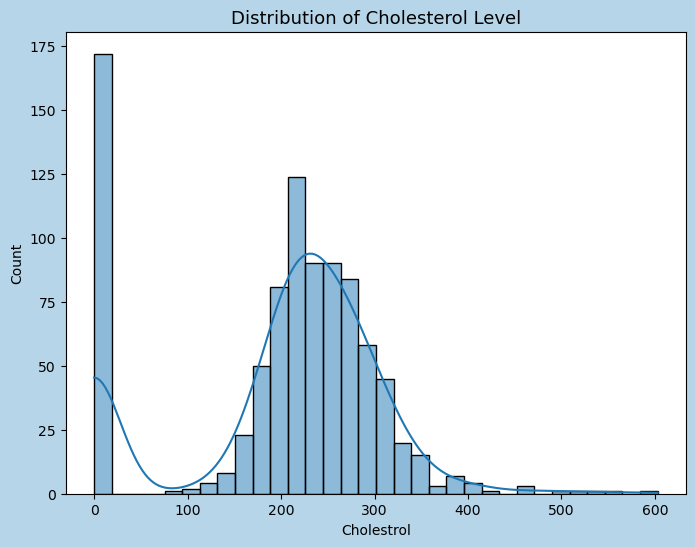

In [29]:
#plot the histogram to see the distribution of Cholestrol level
plt.figure(figsize=(8,6), facecolor='#B6D5E8')
sns.histplot(df, x='chol', kde=True)
plt.title('Distribution of Cholesterol Level', fontsize=13)
plt.xlabel('Cholestrol')
plt.show()

### **`Can Cholestrol be Zero?`🤔**
Cholestrol is a critical component of cell membranes and is necessary for the production of certain hormones and Vitamin D. Having zero Cholestrol in the blood is **medically impossible** because it is eessential for basic cellular functions and overall health.Without cholestrol, Cells would not function properly, making life unsustainable.

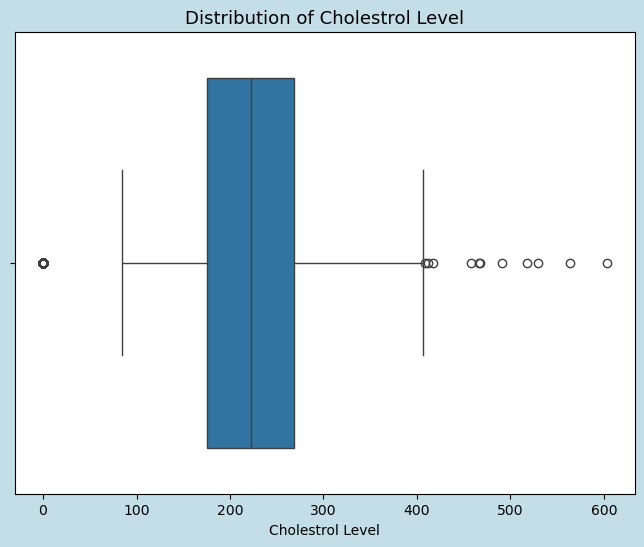

In [30]:
#create a boxplot to visualize the distribution
plt.figure(figsize=(8,6),facecolor='#C3DEE6')
sns.boxplot(df, x='chol')
plt.title('Distribution of Cholestrol Level', fontsize=13)
plt.xlabel('Cholestrol Level')
plt.show()

📊**Insights:**<font color='skyblue'>
- The plot shows a large number of **zero** values that are separate from the main data,could indicate data entry erros,or missing values recorded as zero.
- The typical cholestrol levels are centered around **200 mg/dl**, with most values falling between **175 and 275 mg/dl**.
- There are a few outliers with very high cholestrol levels above **400 mg/dl**.
</font>

> -  Dealing with Zero Values in cholestrol Column

In [31]:
#calculate the percentage of missing values in Chol colum
print('---------------------------------------------------------')
print(f'❉ percentage of missing values in cholestrol column:{round(df['chol'].isnull().sum()/len(df) *100,1)}%')
print('---------------------------------------------------------')

---------------------------------------------------------
❉ percentage of missing values in cholestrol column:3.3%
---------------------------------------------------------


In [32]:
#check all zero values in cholestrol column
print('=============================================')
print("❉ zero values in the cholestrol column:",len(df[df['chol']==0]))

#calculate the percentage of zero values in cholestrol  column
print(f'❉ percentage of Zero cholestrol values:{round(len(df[df['chol']==0]) /len(df) *100,1)}%')
print('=============================================')


❉ zero values in the cholestrol column: 172
❉ percentage of Zero cholestrol values:18.7%


### **Strategy of dealing with cholestrol missing values:🧩**
🧐In my analysis of cholestrol column,i have found some entries with zero values.Since it's  impossible to have a cholestrol level of zero ,these entries likely indiacte problems with data collection or entry.\
To keep the data accurate and reliable for future analysis,i will replace the zero values with `NaN`(Not a Number).This way we mark these entries as missing data.This strategy ensures that statistical calculations and machine learning models are not skewed by these inacuurately recorded values.

In [33]:
#replace the zero values with nan in cholestrol column
df['chol']=df['chol'].replace(0,np.nan)
#check the missing values after replacing zero values with nan
print('===============================================')
print(f"❉ Missing values in the cholestrol column: {round(df['chol'].isnull().sum()/len(df)*100)}%")
print('===============================================')


❉ Missing values in the cholestrol column: 22%


>👀Exploring `fbs`,`restecg`,`thalch`,`exang`,`oldpeak`,`slope`,`ca`,`thal`

In [34]:
cat_columns=['fbs','restecg','exang','slope','thal']

for col in cat_columns:
  print(f"✯ Unique values in the {col} column:",df[col].unique())
  print('\n----------------------------------------')


✯ Unique values in the fbs column: [True False nan]

----------------------------------------
✯ Unique values in the restecg column: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]

----------------------------------------
✯ Unique values in the exang column: [False True nan]

----------------------------------------
✯ Unique values in the slope column: ['downsloping' 'flat' 'upsloping' nan]

----------------------------------------
✯ Unique values in the thal column: ['fixed defect' 'normal' 'reversable defect' nan]

----------------------------------------


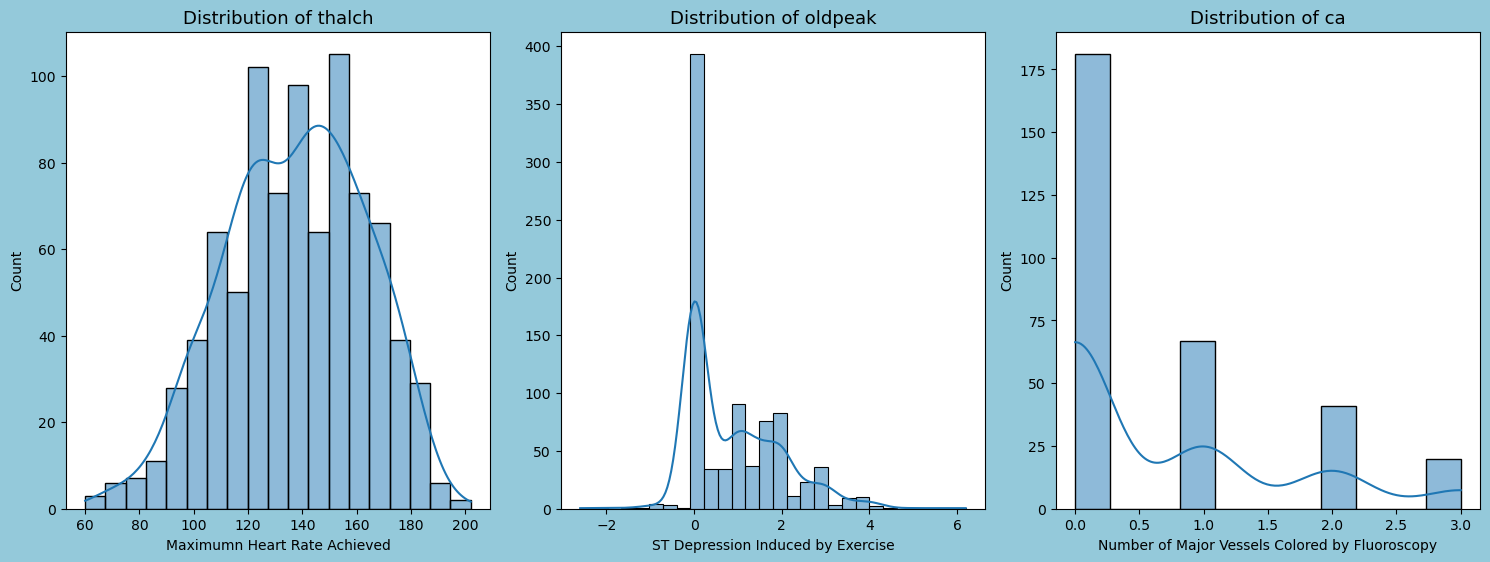

In [35]:
#plot the hisogram of numerical columns to see the distribution

plt.figure(figsize=(15,16), facecolor='#94C9DA')
xlabels={
  'thalch':'Maximumn Heart Rate Achieved',
  'oldpeak': 'ST Depression Induced by Exercise',
  'ca': 'Number of Major Vessels Colored by Fluoroscopy'
}
for i,column in enumerate(df[['thalch','oldpeak','ca']]):
  plt.subplot(3,3,i+1)
  sns.histplot(df, x=column, kde=True)
  plt.title(f'Distribution of {column}', fontsize=13)
  plt.xlabel(xlabels[column], fontsize=10)

plt.tight_layout()
plt.show()
  

📊**Insights:**<font color='skyblue'>

**1. Distribution of thalch(Maximum Heart Rate Achieved):** </font>
  - Most of the people heart rate falls between `100` and `180`.
  - The highest number of people have maximum heart rate around `140`.
       - `Higher maximum heart rates (120 to 200) indicate better heart health.`
       - `Lower maximum heart rates (60 to 140 ) indicate heart problem.`
  
      <font color='skyblue'>
**2. Distribution of oldpeak(ST Depression Induced by Exercise)📉:**</font>
   - Most of the people have oldpeak values between `0` and `2`.
   - The highest number of people have an oldpeak value around `0`, which means no depression.But, some are higher values than the rest.
      - `oldpeak values close to 0 (between -2 and 2) suggests healty heart.`
      - `oldpeak values above 2 often indicate a higher likelihood of heart disease.`

          <font color='skyblue'>
**3. Distribution of ca(Number of Major Vessels Colored by Flourosopy):🔬**</font>
  - The number of major vessels ranges from `0`to `3`. 
  - Most of the people have `0` major vessels colored.The next highest group has `1` vessel colored and a very few peoplw have`2` or`3` vessels colored. 
    - `0 or 1 vessels colored suggests a healthier heart.`
    - `2 or 3 vessels colored indicates higher likelihood of heart disease.`
 - The number of people decrease significantly as the number of colored vessels increases.This means that fewer people have more severe coronary artery disease.
  


   
   

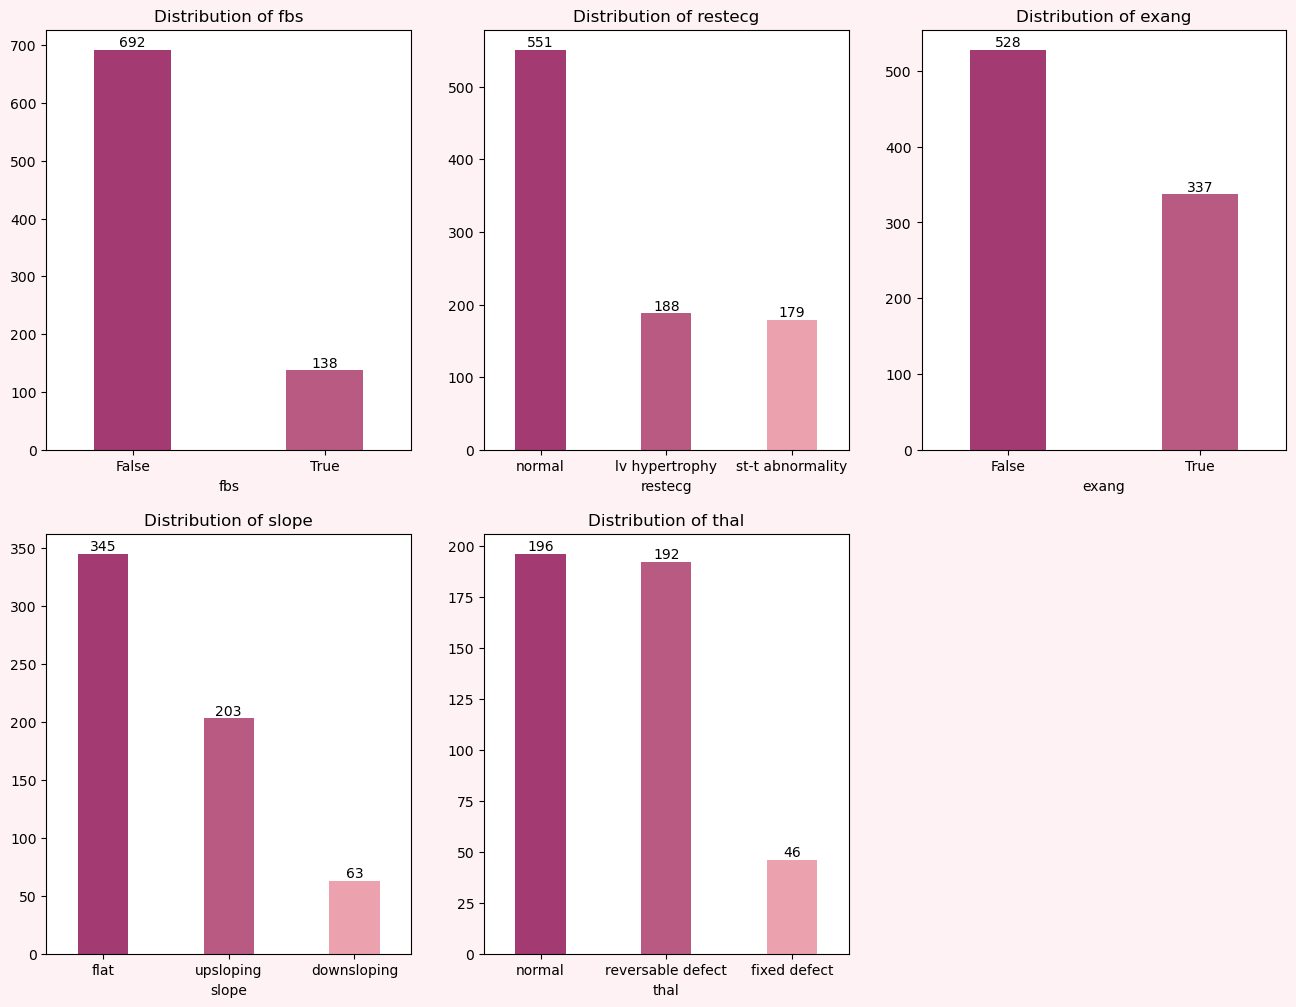

In [36]:
#list of categorical columns to be analyzed
cat_cols=['fbs','restecg','exang','slope','thal']

#plot value count of each categorical column
plt.figure(figsize=(16,12),facecolor='#FFF2F5')

# Plot each categorical column's value counts as a bar plot
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    # Plot the value counts
    value_count= df[col].value_counts()
    value_count.plot(kind='bar',width=0.4, color=['#A43A72','#B95A83','#ECA2AE'])

    # Add labels and title  
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xticks(rotation=360)
    #add value count on each bar
    for index, value in enumerate(value_count):
        # Add value count on each bar
        plt.text(index, value, str(value), ha='center', va='bottom')

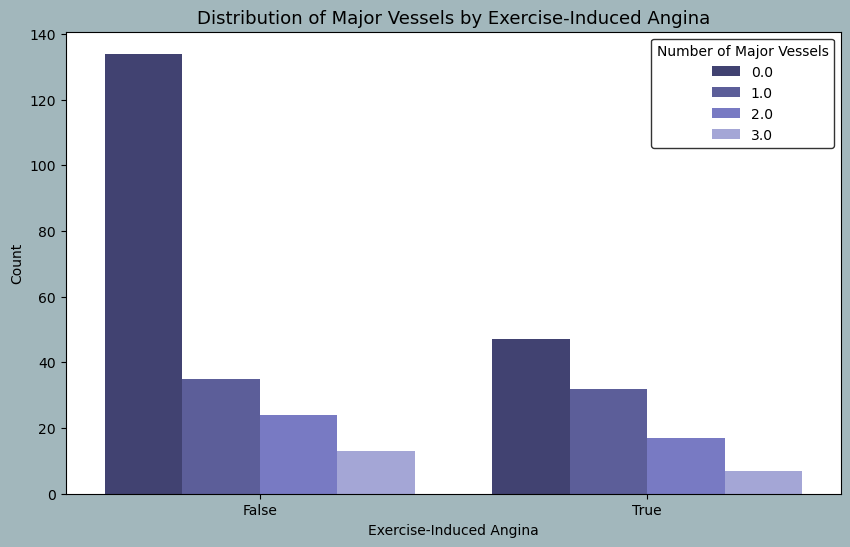

In [37]:
#plot grouped bar chart of exang vs ca
plt.figure(figsize=(10, 6), facecolor='#A2B7BC')
sns.countplot(df,x='exang', hue='ca', palette='tab20b')
plt.title('Distribution of Major Vessels by Exercise-Induced Angina', fontsize=13)
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Number of Major Vessels', edgecolor='black' )
plt.show()

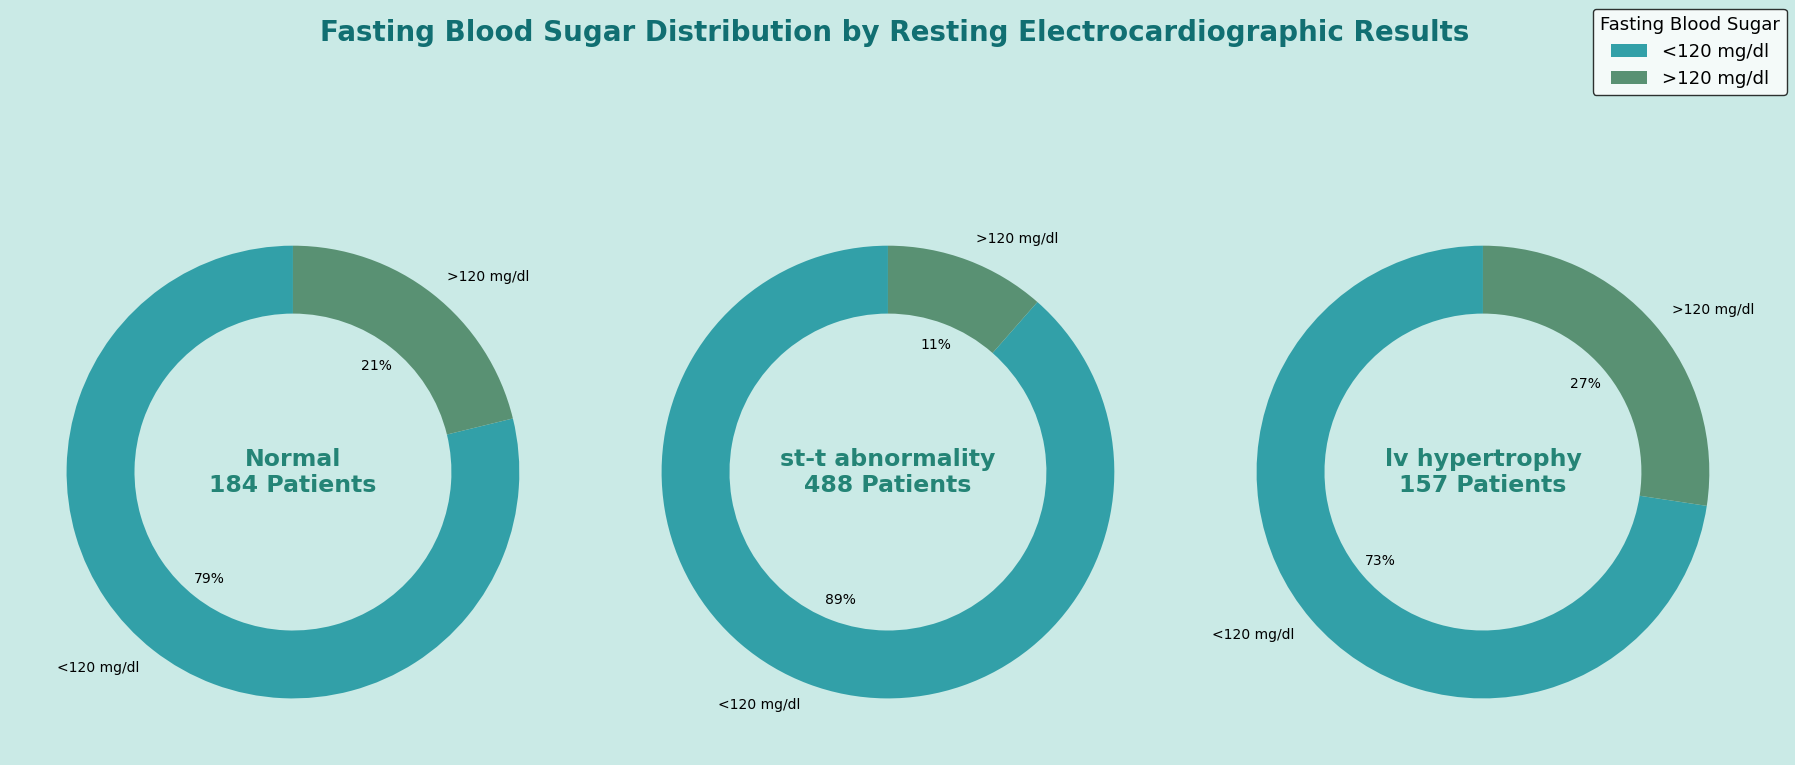

In [38]:
#create a cross tabukation to pre pare the data for Donut chart
cross_tab= pd.crosstab(df['restecg'], df['fbs'])

#create the donut charts
fig,ax=plt.subplots(1,3, figsize=(18,9), facecolor='#CAEAE6')

#Define colors
colors=['#32A0A8', '#599173']

#Titls for the subplots
titles=['Normal', 'st-t abnormality', 'lv hypertrophy']


#plot the donut chart
for i, col in enumerate(cross_tab.index):
    #plot each donut chart
    sizes=cross_tab.loc[col]
    ax[i].pie(sizes, labels=['<120 mg/dl', '>120 mg/dl'],  autopct='%.0f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))    
    # Add text in the middle of the hole
    ax[i].text(0,0 ,f"{titles[i]}\n{sum(sizes)} Patients", ha='center', va='center' ,fontsize=17,  fontweight='bold',color='#248476')

# Add a main title with changed color
fig.suptitle('Fasting Blood Sugar Distribution by Resting Electrocardiographic Results', fontsize=20, fontweight='bold', color='#116F72')

# Add a legend
fig.legend(labels=['<120 mg/dl', '>120 mg/dl'], edgecolor='black', title='Fasting Blood Sugar', fontsize=13, title_fontsize=13)

plt.tight_layout()
plt.show()

>Exploring `num` column.

In [39]:
#plot the countplot of num column
pd.DataFrame(df['num'].value_counts())

,count
num,
0,411
1,265
2,109
3,107
4,28


The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: `0, 1, 2, 3, 4` which states that there are 5 types of heart diseases.

- 0 = no heart disease
- 1 = mild heart disease
- 2 = moderate heart disease
- 3 = severe heart disease
- 4 = critical heart disease

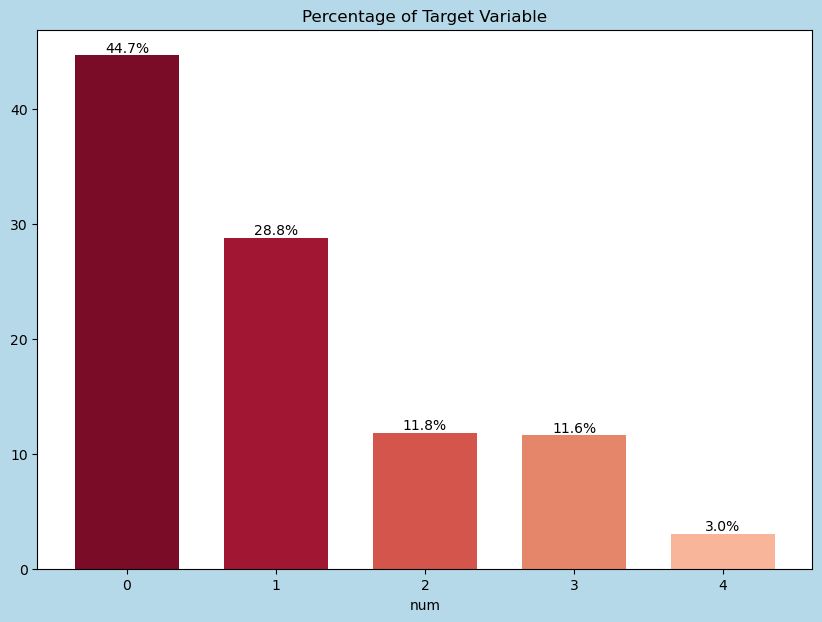

In [40]:
value_count = df['num'].value_counts()* 100/len(df)

plt.figure(figsize=(10,7), facecolor='#B6D9E9')
value_count.plot(kind='bar', width=0.7, color=['#7A0C27','#A11733','#D4554C','#E5866B','#F8B59A' ])
for index,value in enumerate(value_count):
    plt.text(index, value, str(round(value,1))+'%', va='bottom', ha='center')
    #add labels and title
    plt.title('Percentage of Target Variable')
    plt.xlabel('num')
    plt.xticks(rotation=360)
    

#### 🧐` Observation:`
The `num`variable in the dataset is imbalanced. Most cases have no heart disease (`411` cases with `0`), while fewer cases show increasing severity, with the highest severity (`4`) having only `28` cases.📊This imbalance could make a model biased towards predicting no disease, making it harder to detect severe conditions due to the lack of examples. Therefore, simplifying this multiclass problem into a binary classification (`heart disease vs. no heart disease`) is a strategic choice . It makes the task easier and may improve the model's ability to detect heart disease.❤️

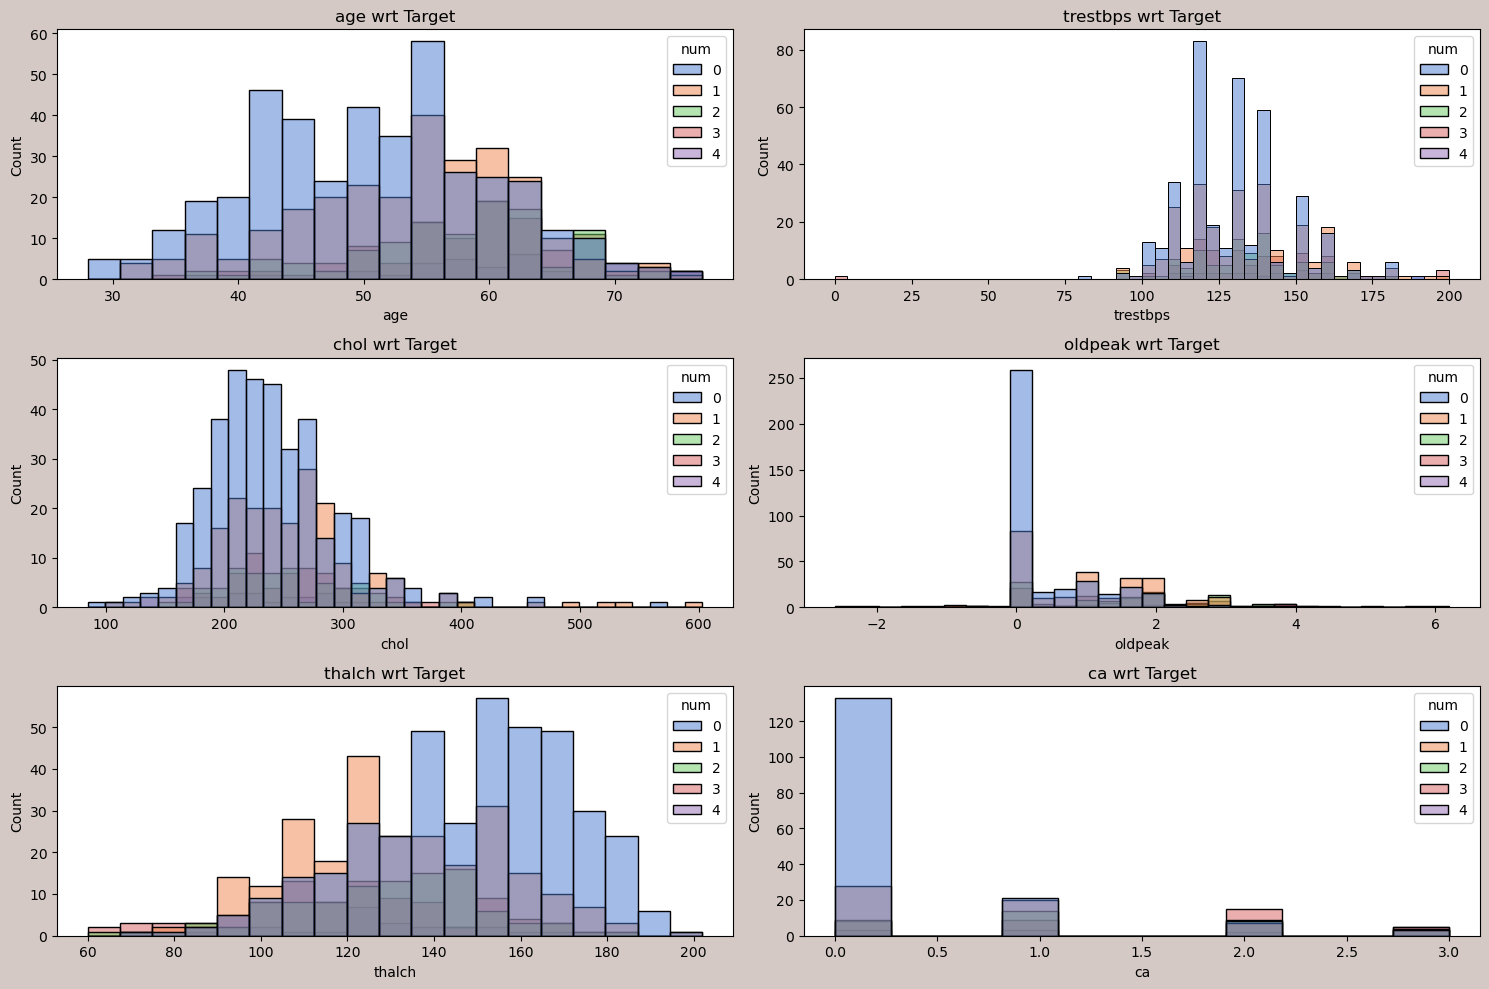

In [41]:
#plot the distribution of age, trestbps, chol, oldpeak, thalch, ca wrt target

plt.figure(figsize=(15,10), facecolor='#D4C9C4')
#define color palette
color_palette = sns.color_palette('muted')
#create hisplot for each  numerical column
for i, column in enumerate(df[['age', 'trestbps', 'chol','oldpeak','thalch','ca']]):
    #create subplotsfor each numerical column
    plt.subplot(3,2, i+1)
    #create histplot
    sns.histplot(df, x=column, hue='num', palette=color_palette)
    #add title
    plt.title(f'{column} wrt Target')
#adjust the layout    
plt.tight_layout()
plt.show()

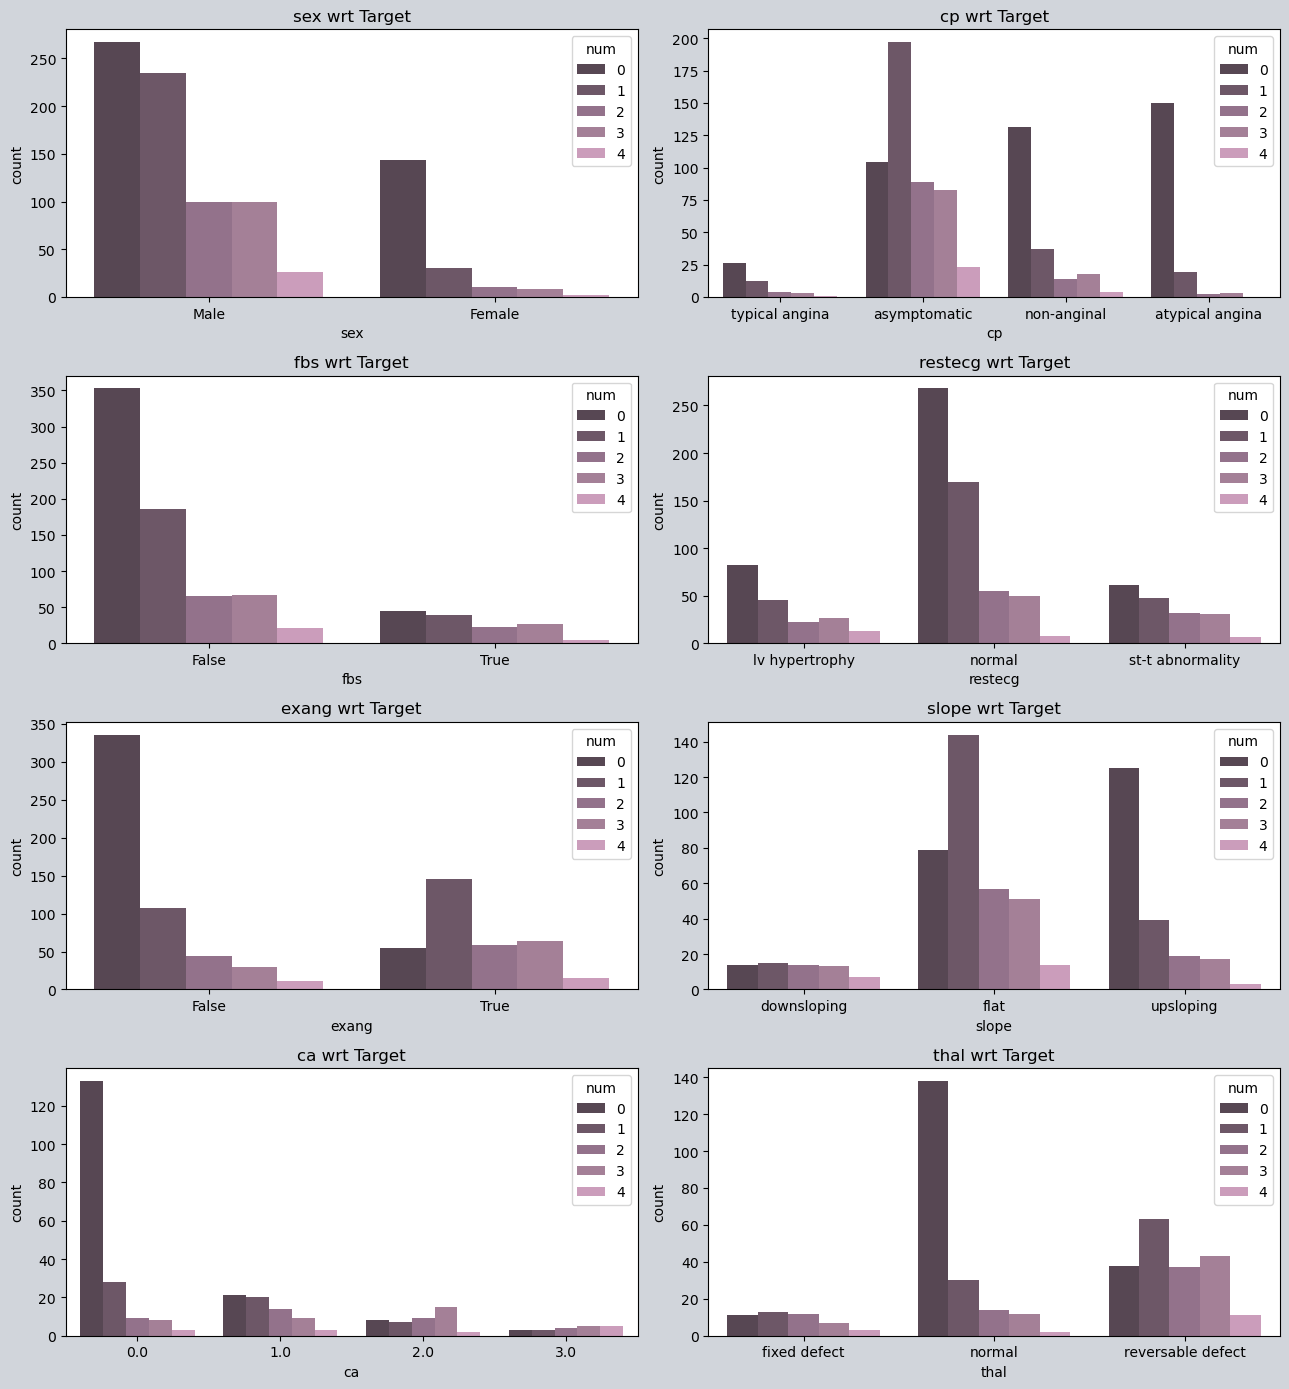

In [42]:
plt.figure(figsize=(13,14), facecolor='#D1D5DB')
#define the color palette
palette=sns.color_palette(['#5A4454','#715369','#996D8E','#AA7A99','#D395BE'])
#create countplot for each categorical column
for i, cat_col in enumerate(df[['sex', 'cp','fbs', 'restecg','exang','slope','ca', 'thal']]):
    #create subplots
    plt.subplot(4,2, i+1)
    #create coutplot for each cat column
    sns.countplot(df, x=cat_col, hue='num', palette=palette)
    #add title to plot
    plt.title(f'{cat_col} wrt Target')
#adjust layout   
plt.tight_layout()
plt.show()


> ##### Identifying Missing values🕵️‍♂️

When dealing with missing data in a dataset, selecting an appropriate imputation method is crucial for maintaining the integrity and accuracy of the data analysis or building machine learning models.

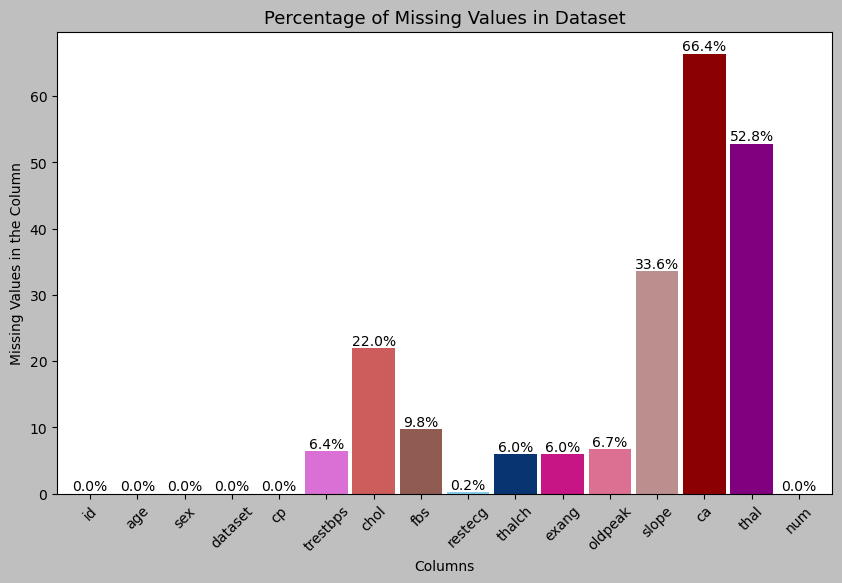

In [43]:
#missing values in the dataset
missing_values = df.isnull().sum() *100/len(df)

#colors for each bar
custom_colors = ['mediumvioletred', 'palevioletred', 'rosybrown', 'darkred', 'purple','orchid','indianred','#905B51','skyblue','#083472']  

# Plotting the bar chart 
plt.figure(figsize=(10, 6), facecolor='#BFBFBF')
missing_values.plot(kind='bar', color=custom_colors, width=0.9)
plt.title('Percentage of Missing Values in Dataset',fontsize=13)
plt.xlabel('Columns')
plt.ylabel('Missing Values in the Column')

# Adding value counts on top of each bar
for i, v in enumerate(missing_values):
    plt.text(i, v, str(round(v,1))+'%', color='black', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

#### 🧐`Observation:`
The missing values in **chol** increased from `3.3% `to `22.0%` because we previously changed `18.7%` of the zero values to missing values.

#### **Correlation Matrix**

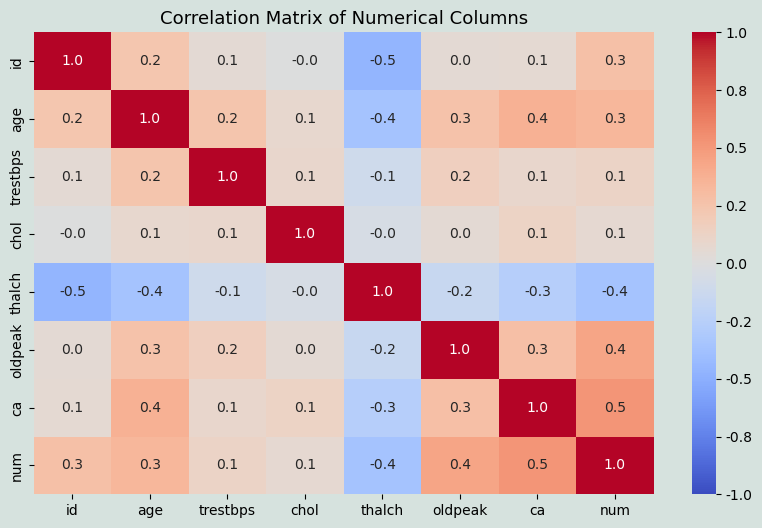

In [44]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6), facecolor='#D6E2DE')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,vmin=-1, vmax=1, fmt='.1f', cbar_kws={'format':'%.1f'})
plt.title('Correlation Matrix of Numerical Columns', fontsize=13)
plt.show()

>  <span style="color:#97C3D9;font-weight:bold; font-size:160%">🔄Impute Missing values </span>

#### **Hybrid Approach for Imputation:🧩✨**

⭐For `trestbps`,`restecg`,`thalch`,`fbs`,`oldpeak`,`exang`:
- **SimpleImputer** is a straightforward method which supports several imputation strategies like `mean`,`median`,`mode` 🧩.This versatility allows you to choose the most appropriate method for your data type and distribution.This is especially useful for smaller datasets or when the percentage of missing values is low, as it preserves the dataset's integrity and makes sure we can still perform accurate analysis or build reliable models.Deleting rows or columns colud lead to significant loss of variable information, especially in smaller datasets.🚫
  
⭐ For `chol`:
- **Iterative Imputer** is an advanced method for filling missing values by iteratively improving predictions based on other features in the dataset 🔄. Despite weak correlations in the 'chol' (cholesterol) column, it was chosen because it captures all available information, potentially uncovering small patterns that simpler methods might miss. It handles complex relationships and maintains the natural variability and structure of the data. This method is versatile, managing both linear and non-linear relationships, making it a valuable tool for maintaining data integrity and quality.🌟

In [45]:
df.select_dtypes(exclude='number').columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [46]:
#create the simple imputer with median startegy for numerical columns
simple_imputer=SimpleImputer(strategy='median')
#fit and transform the data
df['trestbps']=simple_imputer.fit_transform(df[['trestbps']])
df['thalch']=simple_imputer.fit_transform(df[['thalch']])
df['oldpeak']=simple_imputer.fit_transform(df[['oldpeak']])

In [47]:
#create the simple imputer with mode startegy for categorical columns
cat_imputer=SimpleImputer(strategy='most_frequent')
#fit and transform the data
df[['fbs']]=cat_imputer.fit_transform(df[['fbs']])
df[['restecg']]=cat_imputer.fit_transform(df[['restecg']])
df[['exang']]=cat_imputer.fit_transform(df[['exang']])

In [48]:
# Impute missing values using Iterative Imputer
iter_imputer=IterativeImputer(max_iter=10,random_state=42)
#fit and transform the data
df['chol']=iter_imputer.fit_transform(df[['chol']])


Text(0.5, 1.0, 'Missing Values After Imputation of Numerical columns')

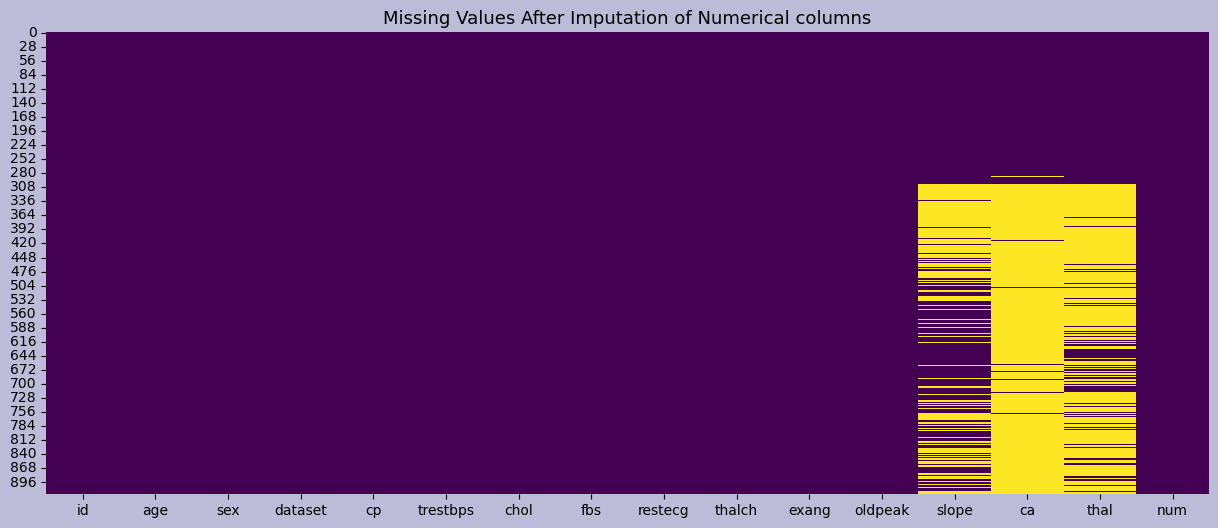

In [49]:
#lets check the missing values after imputation of numerical columns
plt.figure(figsize=(15,6),facecolor='#BDBCD8' )
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values After Imputation of Numerical columns', fontsize=13)

### <font color='#55D5D5'>✤ **Strategy for Imputing Missing Values Using Random Forest 🌳**</font>

I plan to use the Random Forest Algorithm to  impute missing values in features with significant gaps (`slope`,`ca`,`thal`).
##### **`Steps:`**
1. **Seperate the Data:** 
   
    - **Subset A:** Rows without missing values in the target columns.
    - **Subset B:** Rows with missing values in the target columns
2. **Train the Model:**
    
    - Use `Subset A` to train the Random Forest model.
    - Features with complete data will be used as predictors, and the target column with missing values will be the target variable.
3. **Predict Missing Values:**
     
     - Apply the trained Random Forest model to `Subset B` to predict the missing values.
4. **Impute the Data:**
   
   - Replace the missing values in `Subset B` with the predictions.
5. **Recombine the Data:**

      - Combine `Subset A` and the imputed `Subset B` to reconstruct the complete dataset.

In [50]:
#split the dataset into two subsets:one containg the complete data and other containing the rows missing values for 'ca','thal','slope'.Both subsets will include all the columns.

#create a subset with complete data for 'ca', 'thal' and 'slope'.
df_complete=df.dropna()

#create a subset with missing rows values in 'ca','thal' and 'slope'.
df_missing=df[df.isnull().any(axis=1)]




print('---------------------------------------------------------------------')
print('✯ shape of the Complete dataframe with no missing values: '.upper(),df_complete.shape)
print('---------------------------------------------------------------------\n')

print('--------------------------------------------------------------')
print('✯ shape of the dataframe with missing rows values: '.upper(),df_missing.shape)
print('--------------------------------------------------------------')


---------------------------------------------------------------------
✯ SHAPE OF THE COMPLETE DATAFRAME WITH NO MISSING VALUES:  (299, 16)
---------------------------------------------------------------------

--------------------------------------------------------------
✯ SHAPE OF THE DATAFRAME WITH MISSING ROWS VALUES:  (621, 16)
--------------------------------------------------------------


### ✤ Applying Random Forest Algorithm to train the model

In [51]:
#train and evaluate the model for the target variables 'slope','tha', 'ca'.

def predict_and_evaluate(target_variable , drop_columns):
    #drop specified columns from the dataframe
    X=df_complete.drop(drop_columns, axis=1)

    #select target variable(s)
    y=df_complete[target_variable] 

    #initialize labelencoder
    le=LabelEncoder()

    for col in X.columns:
        #if column is of object type
        if X[col].dtype =='object':
            #encode the column
            X[col]=le.fit_transform(X[col])


    #split the data into train and testing sets
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

    #initilaize randomforest calssifier
    model=RandomForestClassifier(n_estimators=10, random_state=42)

    #train the model
    model.fit(X_train,y_train)


    #make predictions on test set
    y_pred=model.predict(X_test)


    #print heading
    print('-------------------------------------------------')
    print('❉ model performance for target varible'.upper(), target_variable)
    print('------------------------------------------------\n')

    #print the accuracy score
    print('⋆ the accuracy of model is:'.upper(), round(accuracy_score(y_test,y_pred),2))
    
    print('⋆ classification_report:\n'.upper(), classification_report(y_test,y_pred))


    #Return the train model
    return model
    

### ✤ Predicting Missing Values with Trained Model

In our data processing, we have a dataset  **df_missing** with many missing values in the `ca`,`slope`, and `thal` columns. Here's how we handle this:

**1. Data Preparation:**
-  Create a new dataframe **df_encoded_pred** by dropping the `slope`, `ca` and `thal` columns from **df_missing**.This step removes the target variables we need to predict.

**2. Encoding and Prediction Function:**
- Define a function **encode_and_predict** to encode categorical features and predict missing values:
    - Initialize a **LabelEncoder** to convert categorical data to numerical format.
    - Iterate through each column in the DataFrame, encoding columns of type **object** (categorical).
    - Use a trained model to predict values for the specified target variable.

**3. Applying the Trained Model:**
- Call the **encode_and_predict** function with **df_encoded_pred**, the target variable name (`slope`, `ca`, or `thal`), and the pre-trained model **rf_models** to predict missing values.

**4. Updating the Original Data:**
- Update the original **df_missing** DataFrame with the predicted values for the `slope`, `ca`, and `thal` columns, filling in the gaps in the dataset.




In [52]:
#create a new dataframe and drop the target varibales

df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

In [53]:
#train and evaluate the model for predicting the slope feature, excluding slop, ca ad tha from the input features.

rf_model_slope = predict_and_evaluate('slope',['slope','ca', 'thal'])

-------------------------------------------------
❉ MODEL PERFORMANCE FOR TARGET VARIBLE slope
------------------------------------------------

⋆ THE ACCURACY OF MODEL IS: 0.72
⋆ CLASSIFICATION_REPORT:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [54]:
#train and evaluate the model for predicting the 'ca ' feature excludig 'ca', 'thal' from the imput features

rf_model_ca = predict_and_evaluate('ca',['ca', 'thal'])

-------------------------------------------------
❉ MODEL PERFORMANCE FOR TARGET VARIBLE ca
------------------------------------------------

⋆ THE ACCURACY OF MODEL IS: 0.72
⋆ CLASSIFICATION_REPORT:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [55]:
# train and evaluate the model for predicting 'thal' feature excludig 'thal' from the imput features

rf_model_thal = predict_and_evaluate('thal',['thal'])

-------------------------------------------------
❉ MODEL PERFORMANCE FOR TARGET VARIBLE thal
------------------------------------------------

⋆ THE ACCURACY OF MODEL IS: 0.7
⋆ CLASSIFICATION_REPORT:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



The prediction's accuracy falls between 70% and 72%, which, in my opinion, is fairly decent.

### ✤ Missing values prediction from Trained Models

In [56]:
def encode_and_predict(df, target_variable, model):

    #initialize labelencoder
    le=LabelEncoder()

    #loop through each column in the dataframe
    for col in df.columns:
        #if column is of type object (categorical)
        if df[col].dtype == 'object':
            #encode the  categorical data into numerical
            df[col] = le.fit_transform(df[col])

   #use the model to apply predictions and assign the predicted values to the target variable
    df[target_variable] = model.predict(df)


### ✤ Predicting Missing values for ca , slope and thal variables

In [57]:
# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)

# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)

# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)

# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

df_encoded_pred = df_missing.drop(['thal'], axis=1)

# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)

# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']

### ✤ Merging Datasets

In [58]:
#concatenate df_complete and df_missing

df = pd.concat([df_complete, df_missing])

print('------------------------------------------')
print('✯ the shape of the dataset is: '.upper(), df.shape)
print('------------------------------------------')


------------------------------------------
✯ THE SHAPE OF THE DATASET IS:  (920, 16)
------------------------------------------


#### ✤ Heatmap for veryfying that the dataset is clean

Text(0.5, 1.0, 'Missing Values After Imputation')

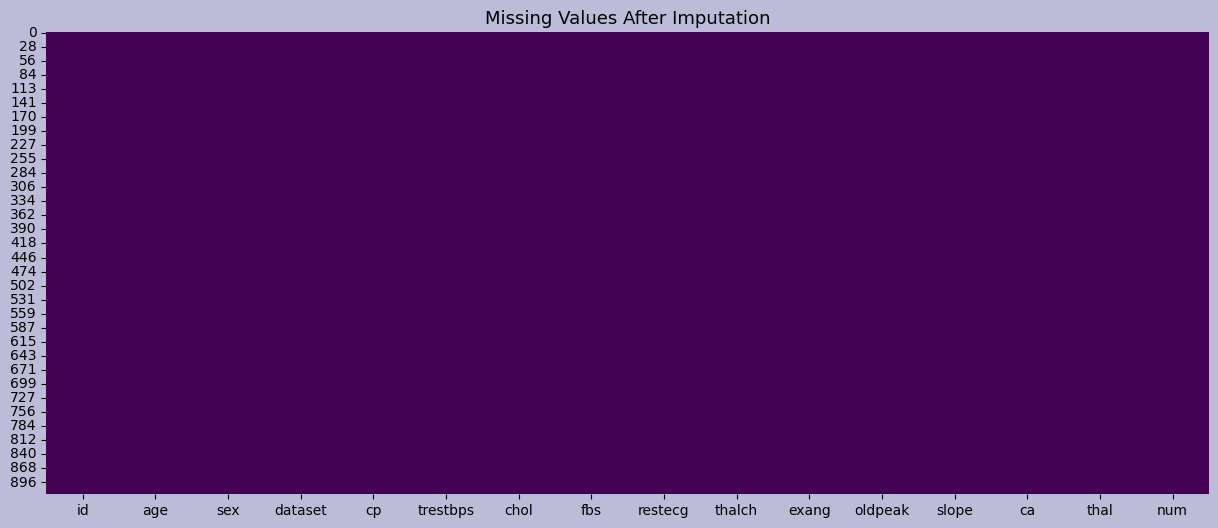

In [59]:
#create heatmap to see the missing values after imputation
plt.figure(figsize=(15,6), facecolor='#BDBCD8')
sns.heatmap(df.isnull() , cmap='viridis', cbar=False)
plt.title('Missing Values After Imputation', fontsize=13)

### **Observation after imputing all misssing values:🧐**
- The dataset is fully complete with no missing values in any of the columns.
- Having a complete dataset is ideal for accurate statistical analysis and machine learning. It means the data was collected thoroughly and is well-prepared for further use. 
- With no missing values, we can confidently explore, visualize patterns, and draw meaningful insights.

In [60]:
#scattter plot of thalch and oldpeak
fig=px.scatter(df, x='thalch',y='oldpeak', size='thalch', width=1000,height=500)
fig.update_layout(title='scatter plot of thalch and oldpeak', xaxis_title='Maximum Heart Rate Achieved', yaxis_title='ST Depression Induced by Exercise',
                   title_font_size=17,paper_bgcolor='#CDE3EF')
fig.show()

In [61]:
#scatterplot of thalch and age
fig=px.scatter(df, x='age', y='thalch',title='Maximum Heart Rate Achieved by Age',color='sex',size='thalch', width=1000,height=500)
fig.update_layout(xaxis_title='Maximum Heart Rate Achieved', title_font_size=17,paper_bgcolor='#FFE9E9')
fig.show()

> <span style="color:#97C3D9;font-weight:bold; font-size:150%">Why Scaling Matters?</span>


**`Scaling`** in data processing is about adjusting the range of values so that they are easier to compare and use in calculations. This is especially important for machine learning models, which can be sensitive to differences in value ranges.

##### ✤ Min-Max Scaling
Min-Max Scaling is a method that adjusts numerical data to fit within a specific range, usually `[0, 1]` . This helps to make sure all features are on the same scale, which can boost the performance and speed up the training of many machine learning models.

##### ✤ In the Context of the Heart Disease Dataset
Scaling continuous variables is essential in heart disease prediction to normalize the feature magnitudes, ensuring that each variable contributes equally to the analytical models and improving algorithm performance. Therefore, I will be using the min-max scaling of the continuous variables except the `oldpeak` column. Due to the distribution of the oldpeak feature, I will be applying binning instead.Scaling will be applied during the machine learning process, specifically in the model building and hyperparameter tuning steps.
Scaling will be applied during **model building** as part of a **pipeline**, ensuring that transformations such as scaling are consistently and correctly applied during both training and hyperparameter tuning.

In [62]:
df['oldpeak'].describe()

count    920.000000
mean       0.853261
std        1.058049
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

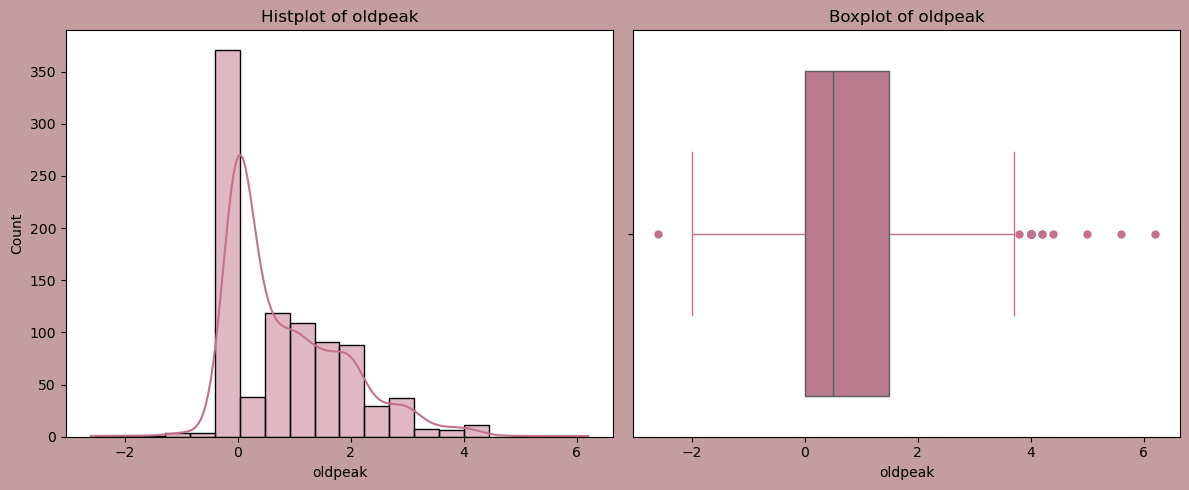

In [63]:
# plot the histogram and boxplot of oldpeak

fig , (ax1, ax2)= plt.subplots(1, 2, figsize=(12, 5), facecolor='#C39D9F')

# Histogram and KDE plot on the first subplot
sns.histplot(df['oldpeak'], kde=True, color='#C3728B', bins=20, ax=ax1)
ax1.set_title('Histplot of oldpeak')

# Boxplot on the second subplot
sns.boxplot(x=df['oldpeak'], color='#C3728B', ax=ax2, whiskerprops=dict(color='#C3728B'),
            capprops=dict(color='#C3728B'), flierprops=dict(markerfacecolor='#C3728B', marker='o', markeredgecolor='#C3728B', markersize=5 ))
ax2.set_title('Boxplot of oldpeak')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<span style="color:#BCBCD5;font-weight:bold; font-size:130%">✤ Discretizing the 'Oldpeak':Binning ST Depression for analysis 🗂️</span>

To resolve the right-skewed nature of the `Oldpeak `variable, I plan to use binning. This technique will group continuous data into discrete intervals, making the data simpler and reducing the impact of outliers and extreme values. By doing this, we can create a more balanced and manageable dataset for our model. 🌟

In [64]:
sorted_unique_oldpeak=np.sort(df['oldpeak'].unique())
print(sorted_unique_oldpeak)

[-2.6 -2.  -1.5 -1.1 -1.  -0.9 -0.8 -0.7 -0.5 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7
  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.8  2.9  3.   3.1  3.2
  3.4  3.5  3.6  3.7  3.8  4.   4.2  4.4  5.   5.6  6.2]


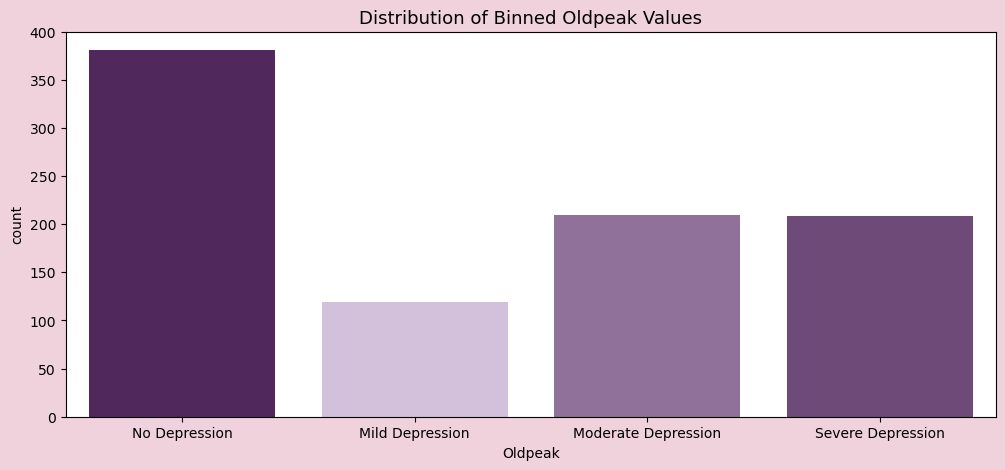

In [65]:
# Create the bins edges based on the quartiles
bins = [-2.6, 0.0, 0.5, 1.5, 6.2 ]

colors_palette= ['#542064', '#D5BCE0', '#926AA0','#724281' ]

# Create the bin lables
bin_labels = ['No Depression', 'Mild Depression' , 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' column
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bins, labels = bin_labels)
oldpeak=df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1 , inplace=True)


#plot the distribution of the binned data

plt.figure(figsize=(12,5), facecolor='#F0D2DC')
sns.countplot(x=oldpeak, palette=colors_palette)
plt.title('Distribution of Binned Oldpeak Values' , fontsize=13)
plt.xlabel('Oldpeak')

plt.show()

> <span style="color:#97C3D9;font-weight:bold; font-size:160%">Dealing With Outliers </span>

##### ✯ What Are Outliers?
`outliers` are data points that significantly differ from the majority of other data points in a dataset. These values can be extremely high or low compared to the rest of the data.


##### ✯ Why Do We Remove Outliers?
- Outliers can skew statistical measures like the mean or standard deviation, leading to results that are not truly representative of the underlying data.
- Outliers can negatively affect the performance of machine learning models, potentially causing the models to overfit to these anomalies rather than capturing the general pattern in the data.
- Outliers may sometimes result from data entry errors or other mistakes, making them irrelevant to the analysis.
- Removing outliers can make the data easier to analyze and interpret, resulting in clearer insights and more robust conclusions.



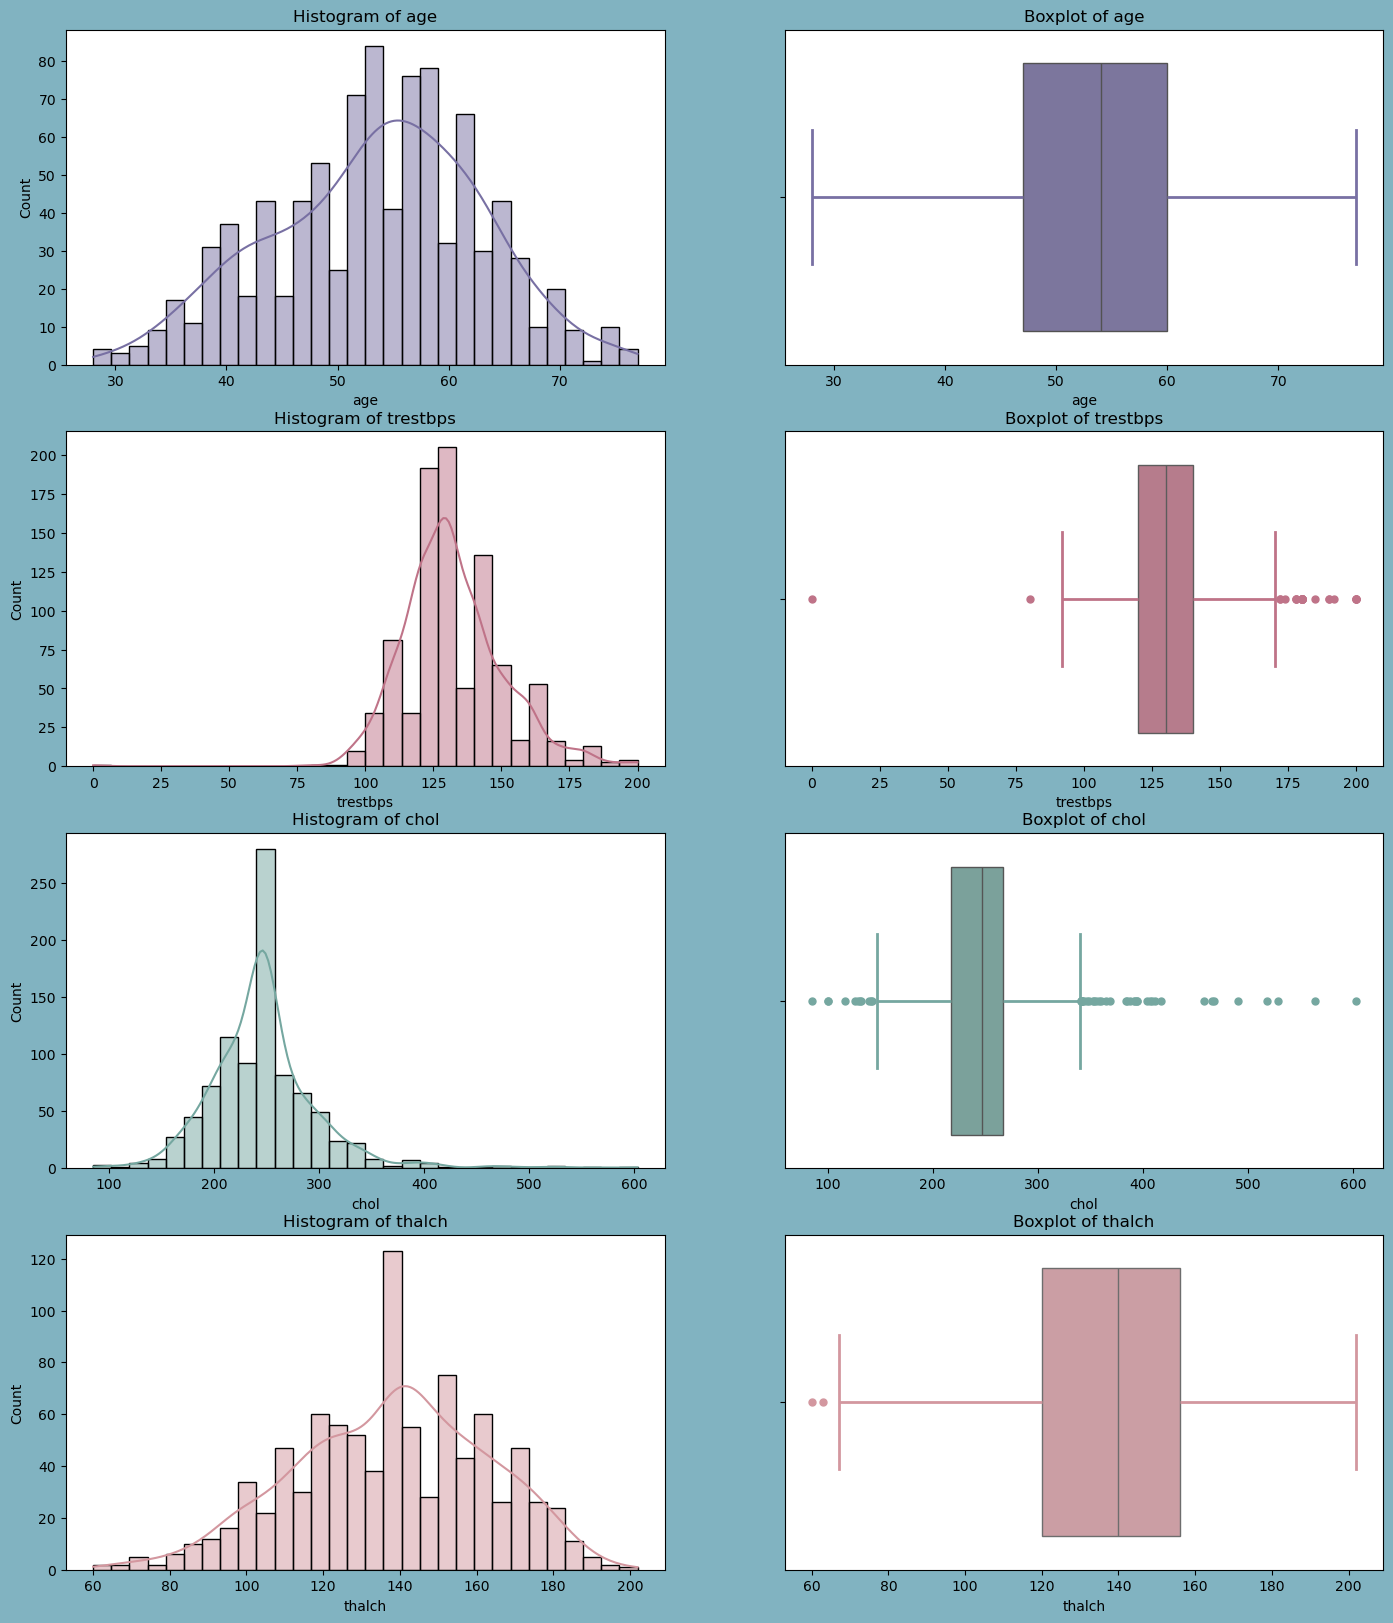

In [66]:
#plot the histogram and boxplot of numerical columns
num_cols = ['age', 'trestbps', 'chol', 'thalch']
colo=['#7870A3','#BF7388','#75A7A0','#D3979F','#C7C1C3']

# Set up the figure and axes
fig, axes = plt.subplots(4,2, figsize=(17,20), facecolor='#81B3C1')



# Loop over columns and plot
for i, col in enumerate(num_cols):
    # Histogram with KDE plot
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i, 0], color=colo[i])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color=colo[i], whiskerprops=dict(color=colo[i], linewidth=2),
                capprops=dict(color=colo[i], linewidth=2),
                flierprops=dict(markerfacecolor=colo[i], marker='o', markersize=5, markeredgecolor=colo[i]))
    axes[i, 1].set_title(f'Boxplot of {col}')

# Show the plot
plt.show()


In [67]:
# print the row where tresbps is zero
df[df['trestbps']==0]



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,246.832869,False,normal,155.0,False,1.5,flat,1.0,normal,3


In [68]:
# Remove the row  where trestbps is zero
df=df[df['trestbps'] !=0]

# Check the shape of  data  after removing the zero  value
print(f'❉ The shape of the Dataset is: {df.shape}'.upper())

❉ THE SHAPE OF THE DATASET IS: (919, 16)


<span style="color: #CABBDB; font-size:120%">✤ I'm keeping the outliers in the dataset because they can be valuable for prediction ✨. Outliers often hold important insights about unusual patterns in the data and can reveal key relationships between variables. Instead of treating them as errors, outliers can guide us in uncovering hidden trends that improve our model's accuracy 🚀. Ignoring them could lead to missing important insights.🌟</span>

> <span style="color: #97C3D9; font-size:160% ;font-weight:bold">🔄 Transforming the Multilabel Target Variable into Binary Classification</span>

#####  ✯ Why I Transformed the Target variable?
In the dataset, the `num` variable represents the severity of heart disease as a multiclass variable with values ranging from `0` (no heart disease) to `4` (varying level of severity).For this project, I transformed this varibale into a binary classification with 2 two stages:
   - **0**: No heart disease
   - **1**: Presence of heart disease (combining the original stages `1`,`2`,`3`, and `4`).
  
**Why?**: Transforming the target variable into binary classification simplifies the problem by focusing on predicting the **presence** or **absence** of heart disease, rather than its severity. This not only makes the model easier to interpret but also aligns with the project’s primary goal of detecting heart disease. Additionally, binary classification often leads to better results because many machine learning algorithms are optimized for this type of task. This simplification reduces the complexity of the problem, making it easier for the model to find patterns in the data. It also helps the model adapt better to new data and handle situations where one class is much more common than the other. In practical healthcare applications, binary classification provides clear and actionable insights, allowing healthcare providers to make quicker decisions regarding a patient’s heart disease status.


In [69]:
# value count of num variable
pd.DataFrame(df['num'].value_counts())

,count
num,
0,411
1,265
2,109
3,106
4,28


In [70]:
#create the new column 'num_binary' in the dataframe 'df'

#if 'num' is greater than 0 , num_binary is 1 , otherwise 0
df['num_binary'] = df['num'].apply(lambda x:  1 if x >0 else 0)


In [71]:
# Replace the 'num' column with he 'num_binary' column
df['num']=df['num_binary']

# Drop the 'num_binary column' as it is no longer needed
df.drop('num_binary', axis=1, inplace=True)

In [72]:
# value count after transformation
print('-------------------------------------------------------')
print('❉ VALUE COUNT OF TARGET VARIABLE AFTER TRANSFORMATION:')
print('-------------------------------------------------------')
pd.DataFrame(df['num'].value_counts().sort_values(ascending=True))

-------------------------------------------------------
❉ VALUE COUNT OF TARGET VARIABLE AFTER TRANSFORMATION:
-------------------------------------------------------


,count
num,
0,411
1,508


> <span style='color:#83BEB4; font-size:160%; font-weight:bold'>🚀 Hyperparameter Tuning & Model Evaluation </span>

I focus on optimizing the model by tuning its hyperparameters to achieve the best possible performance. I utilize GridSearchCV to explore various combinations of hyperparameters to identify the most effective ones for the model. After tuning, I evaluate the model’s performance using metrics like accuracy, precision, recall, and F1-score. This evaluation helps me understand how well the model generalizes to unseen data, ensuring that it is accurate and reliable for predicting heart disease.



In [73]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [74]:
# split the data into features and target

X = df[['age','sex','cp','trestbps','chol','fbs','restecg','exang','ca','oldpeak','slope','thal']]   #Features
y = df['num']   #Target variable

In [75]:
# Select the numerical and categorical columns

numerical_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object','category','bool']).columns


# Define a pipeline for Numerical Transformation
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('quantile', QuantileTransformer(random_state=42, output_distribution='normal', n_quantiles=476))
])


# Define column transfomer to apply different transformations

preprocessor = ColumnTransformer(
    transformers = [
        # Apply scalig tranformer to numerical columns
        ('num', numerical_transformer,numerical_cols),
        # Apply one hot encoder to categorical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ] 
)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [76]:
#import the models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
# Define the models and their hyperparameters

models = {
    'Support Vector Machine': (SVC(),{
        'model__C': [1, 10],
        'model__kernel': ['rbf'],
        'model__gamma': ['scale']
    }),

    'Logistic Regression': (LogisticRegression(),{
        'model__penalty': ['l2'],
        'model__C': [1, 10],
        'model__max_iter': [1000]
    }),

    'Random Forest Classifier': (RandomForestClassifier(),{
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 4]
    }),

    'GradientBoosting Classifier': (GradientBoostingClassifier(verbose=0),{
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.2],
        'model__max_depth': [3, 4]
    }),

    'AdaBoost Classifier': (AdaBoostClassifier(),{
        'model__n_estimators': [10, 100]
    }),

    'XGBoost Classifier': (XGBClassifier(),{
        'model__max_depth': [3, 4],
        'model__learning_rate': [0.1, 0.3],
        'model__n_estimators': [50, 100],
    }),

    'K-Nearest Neighbors': (KNeighborsClassifier(),{
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),

    'Decision Tree Classifier': (DecisionTreeClassifier(),{
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    })    
}

In [77]:
# Initialize the list to store the model performance and best parameter 

model_scores = []
best_params_list = []

# Iterate over the models dictionary to train and evaluate each model
for name, (model,params) in models.items():

    # Define the pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])


    # Intialize  GridSearchCV with the currect model's pipeline and parameters
    grid = GridSearchCV(pipeline, params, cv=5, verbose=0, n_jobs=-1)

    
    # Fit the GridsearchCV to the training data
    grid.fit(X_train, y_train)


    # Retrieve the best estimator and best parameters from the grid search
    best_model = grid.best_estimator_
    best_params = grid.best_params_


    # Predict on the test set using the best estimator
    y_pred = best_model.predict(X_test)


    # Store performance metrics for the current model
    model_scores.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 2),
        'Precision': round(precision_score(y_test, y_pred, average='weighted'), 2),
        'Recall': round(recall_score(y_test, y_pred, average='weighted'), 2),
        'F1': round(f1_score(y_test, y_pred, average='weighted'), 2)
    }) 


    # Store the best parameters for the current model
    best_params_list.append({
        'Model ': name,
        'Best Parameters: ': best_params
    })


# Sort the model scores
best_performance = pd.DataFrame(model_scores)
best_performance = best_performance.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Print the model performance and best parameters
print('-------------------------------------')
print("❉ Classification Models Performance:".upper())
print('-------------------------------------')
print(tabulate(best_performance, headers='keys', tablefmt='fancy_grid'))
print('\n')

print('----------------------------------')
print("❉ Best Parameters for Each Model:".upper())
print('----------------------------------')
print(tabulate(best_params_list, headers='keys', tablefmt='fancy_grid'))


-------------------------------------
❉ CLASSIFICATION MODELS PERFORMANCE:
-------------------------------------
╒════╤═════════════════════════════╤════════════╤═════════════╤══════════╤══════╕
│    │ Model                       │   Accuracy │   Precision │   Recall │   F1 │
╞════╪═════════════════════════════╪════════════╪═════════════╪══════════╪══════╡
│  0 │ XGBoost Classifier          │       0.87 │        0.87 │     0.87 │ 0.87 │
├────┼─────────────────────────────┼────────────┼─────────────┼──────────┼──────┤
│  1 │ Support Vector Machine      │       0.86 │        0.86 │     0.86 │ 0.86 │
├────┼─────────────────────────────┼────────────┼─────────────┼──────────┼──────┤
│  2 │ Random Forest Classifier    │       0.86 │        0.86 │     0.86 │ 0.86 │
├────┼─────────────────────────────┼────────────┼─────────────┼──────────┼──────┤
│  3 │ GradientBoosting Classifier │       0.85 │        0.85 │     0.85 │ 0.85 │
├────┼─────────────────────────────┼────────────┼─────────────┼────

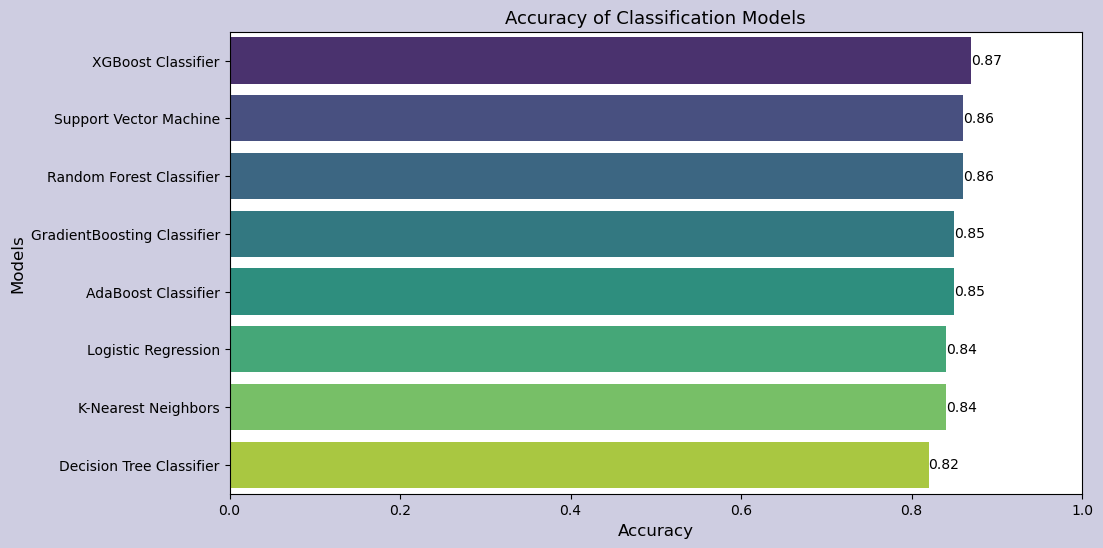

In [78]:
# Create bart plot to compare the model performance
plt.figure(figsize=(11,6), facecolor='#CECDE1')
sns.barplot(x='Accuracy', y='Model', data=best_performance, palette='viridis')
plt.title('Accuracy of Classification Models', fontsize=13)
plt.xlim(0,1) # Accuracy is between 0 and 1

# Add accuracy labels to the bars
for index, value in enumerate(best_performance['Accuracy']):
    plt.text(value, index, str(value), va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.show()

<span style= 'color:#E9BDD9; font-size:190%'>✤ Applying the Best params to the model </span>


In [79]:
# Fit the best model (XGBoost) on the entire training data
best_xgb_model = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=50
)

# Define the final pipeline with preprocessing and XGBoost model
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_xgb_model)
])

# Fit the final model to the training data
final_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('quantile',
                                                                   QuantileTransformer(n_quantiles=476,
                                                                                       output_distribution='normal',
                                                                                       random_state=42))]),
                                                  Index(['age', 'trestbps', 'chol', 'ca', 'oldpeak'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'cp', 'fbs', 'reste...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [80]:

# Predict and evaluate the final model
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print('------------------------------')
print(f"❉ Final Model Accuracy: {final_accuracy:.2f}")
print('------------------------------')

------------------------------
❉ Final Model Accuracy: 0.87
------------------------------


<span style= 'color:#CFACA9; font-size:180%'>✤ Confusion Matrix </span>  

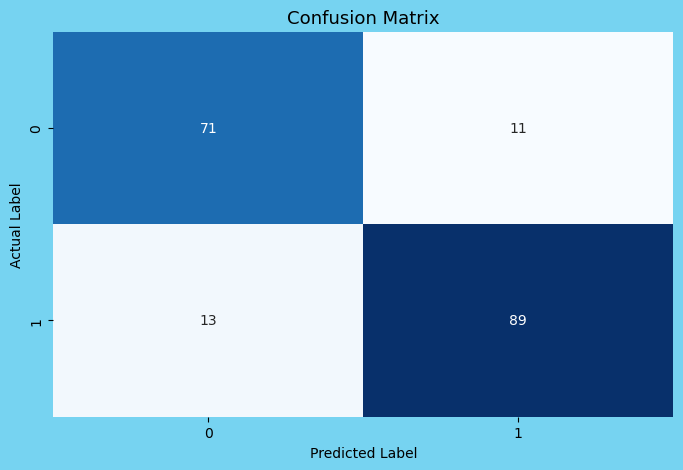

In [81]:
plt.figure(figsize=(8,5),facecolor='#76D3F1')
cm = confusion_matrix(y_test, final_predictions)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True,  cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix', fontsize=13)
plt.show()

In [82]:
# Concatenating the actual and predicted labels into a single DataFrame
actual_label = pd.DataFrame(y_test).rename(columns={0: 'Actual_Label'}).reset_index().drop(columns=['index'])
predicted_label = pd.DataFrame(final_predictions, columns=['Predicted_Label']).reset_index().drop(columns=['index'])

# Combining the two DataFrames
output_data_frame = pd.concat([actual_label, predicted_label], axis=1)

# Display the full DataFrame with gradient background
output_data_frame.head(5).style.background_gradient(cmap='Blues')


,num,Predicted_Label
0,1,1
1,1,1
2,1,0
3,0,0
4,1,1


In [83]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [85]:
# libraries for displaying widgets in the notebook 
import ipywidgets as widgets
from IPython.display import display

# Define the final model and fit to the training data
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50))
])

best_model.fit(X_train, y_train)

# Create the widgets for user input
age = widgets.IntText(description='Age:')
sex = widgets.Dropdown(options={'Male': '0', 'Female': '1'}, description='Sex:')
cp = widgets.Dropdown(options={
    'typical angina': '0',
    'asymptomatic': '1',
    'non-anginal': '2',
    'atypical angina': '3'
}, description='Chest pain:')
trestbps = widgets.FloatText(description='Resting Blood Pressure:')
chol = widgets.FloatText(description='Cholesterol:')
fbs = widgets.Dropdown(options={'True': '1', 'False': '0'}, description='Fasting Blood Sugar:')
restecg = widgets.Dropdown(options={
    'lv hypertrophy': '0',
    'normal': '1',
    'reversable defect': '2'
}, description='Rest ECG:')
exang = widgets.Dropdown(options={'Yes': '1', 'No': '0'}, description='Exercise Induced Angina:')
ca = widgets.FloatText(description='Number of Major Vesselsc:')
oldpeak = widgets.FloatText(description='ST Depression:')
slope = widgets.Dropdown(options={
    'downsloping': '0',
    'flat': '1',
    'upsloping': '2'
}, description='Slope')
thal = widgets.Dropdown(options={
    'fixed defect': '0',
    'normal': '1',
    'reversable defect': '2'
}, description='Thalassemia:')


# Define the function to handle the button click
def predict_heart_disease(button):
    input_data = pd.DataFrame({
    'age': [age.value],
    'sex': [sex.value],
    'cp': [cp.value],
    'trestbps': [trestbps.value],
    'chol': [chol.value],
    'fbs': [fbs.value],
    'restecg': [restecg.value],
    'exang': [exang.value],
    'ca': [ca.value],
    'oldpeak': [oldpeak.value],
    'slope': [slope.value],
    'thal': [thal.value]
    })
    
    prediction = best_model.predict(input_data)
    if prediction[0] == 1:   #Acess the first element of array
            print("The model predicts that the person has heart disease.")
    else:
            print("The model predicts that the person does not have heart disease.")

    
# Button to make prediction
button = widgets.Button(description='Predict')
button.on_click(predict_heart_disease)

# Display the widgets and output area
display(age, sex, cp, trestbps, chol, fbs, restecg, exang, ca, oldpeak, slope, thal, button)


IntText(value=0, description='Age:')

Dropdown(description='Sex:', options={'Male': '0', 'Female': '1'}, value='0')

Dropdown(description='Chest pain:', options={'typical angina': '0', 'asymptomatic': '1', 'non-anginal': '2', '…

FloatText(value=0.0, description='Resting Blood Pressure:')

FloatText(value=0.0, description='Cholesterol:')

Dropdown(description='Fasting Blood Sugar:', options={'True': '1', 'False': '0'}, value='1')

Dropdown(description='Rest ECG:', options={'lv hypertrophy': '0', 'normal': '1', 'reversable defect': '2'}, va…

Dropdown(description='Exercise Induced Angina:', options={'Yes': '1', 'No': '0'}, value='1')

FloatText(value=0.0, description='Number of Major Vesselsc:')

FloatText(value=0.0, description='ST Depression:')

Dropdown(description='Slope', options={'downsloping': '0', 'flat': '1', 'upsloping': '2'}, value='0')

Dropdown(description='Thalassemia:', options={'fixed defect': '0', 'normal': '1', 'reversable defect': '2'}, v…

Button(description='Predict', style=ButtonStyle())

### Conclusion 💡
In this project, I successfully developed a machine learning model to predict heart disease risk using various patient data. By employing preprocessing techniques like **scaling**, **encoding**, and addressing **missing values**, I trained and evaluated several models, with **XGBoost** delivering the best performance at `87% `accuracy. This result highlights the model's potential to assist in identifying heart disease risks.
While the model shows promising results, there is room for improvement. Future enhancements could include incorporating additional features such as lifestyle factors or genetic data to increase predictive power. I could also explore advanced techniques like **ensemble learning** and **neural networks** for potentially better performance. Moreover, refining hyperparameter tuning and experimenting with different cross-validation strategies may help further optimize the model. Ultimately, this project highlights the potential of machine learning in healthcare, offering valuable support for early detection and more effective management of heart disease.🚀